# House Price Prediction :
Develop a machine learning model for
predicting house prices using Python,
scikit-learn, and TensorFlow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Exploratory Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.shape

(1460, 81)

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Dropping unneccessary columns

In [9]:
# ID is not necessary for regression
df = df.drop(['Id'],axis=1)

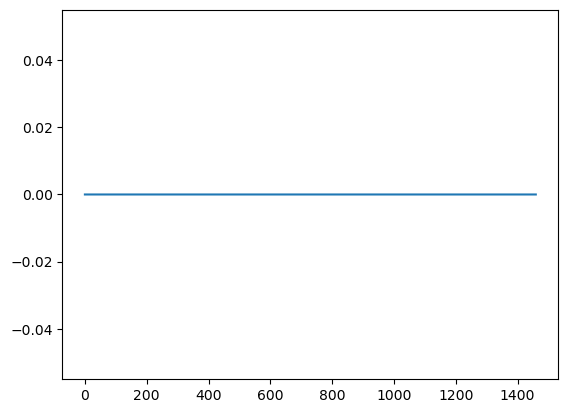

In [10]:
# TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
# Let us verify that
plt.plot(df.TotalBsmtSF - df.BsmtFinSF1-df.BsmtFinSF2-df.BsmtUnfSF)

In [11]:
# So we can drop TotalBsmtSF
df = df.drop(['TotalBsmtSF'],axis=1)

In [12]:
#Alley, PoolQC and MiscFeature have very few non-null values, so let's drop them

# So we can drop TotalBsmtSF
df = df.drop(['Alley', 'PoolQC', 'MiscFeature'],axis=1)

# Handling null values

In [13]:
for i in df[df.columns[df.isnull().any()]].columns:
    print('- ',i)

-  LotFrontage
-  MasVnrType
-  MasVnrArea
-  BsmtQual
-  BsmtCond
-  BsmtExposure
-  BsmtFinType1
-  BsmtFinType2
-  Electrical
-  FireplaceQu
-  GarageType
-  GarageYrBlt
-  GarageFinish
-  GarageQual
-  GarageCond
-  Fence


In [14]:
# Since it is just one rowm Let's drop the null rows for Electrical
df.dropna(subset=['Electrical'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

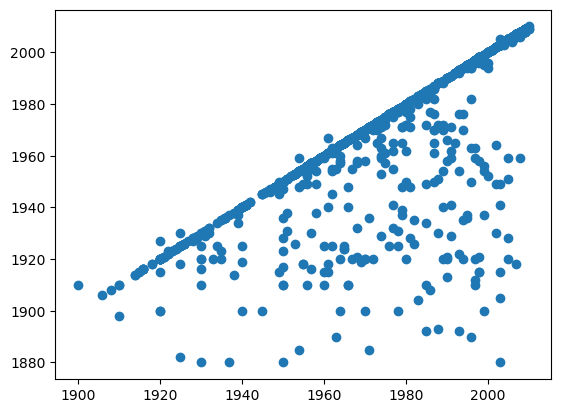

In [16]:
plt.scatter(df.GarageYrBlt,df. YearBuilt)

In [17]:
df[['GarageYrBlt','YearBuilt']].corr()

GarageYrBlt  YearBuilt
GarageYrBlt     1.000000   0.825503
YearBuilt       0.825503   1.000000

In [18]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [19]:
#Let's just remove all the null rows in LotFrontage
df.dropna(subset=['LotFrontage'],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1200 non-null   int64  
 1   MSZoning       1200 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1200 non-null   int64  
 4   Street         1200 non-null   object 
 5   LotShape       1200 non-null   object 
 6   LandContour    1200 non-null   object 
 7   Utilities      1200 non-null   object 
 8   LotConfig      1200 non-null   object 
 9   LandSlope      1200 non-null   object 
 10  Neighborhood   1200 non-null   object 
 11  Condition1     1200 non-null   object 
 12  Condition2     1200 non-null   object 
 13  BldgType       1200 non-null   object 
 14  HouseStyle     1200 non-null   object 
 15  OverallQual    1200 non-null   int64  
 16  OverallCond    1200 non-null   int64  
 17  YearBuilt      1200 non-null   int64  
 18  YearRemo

# Outlier removal

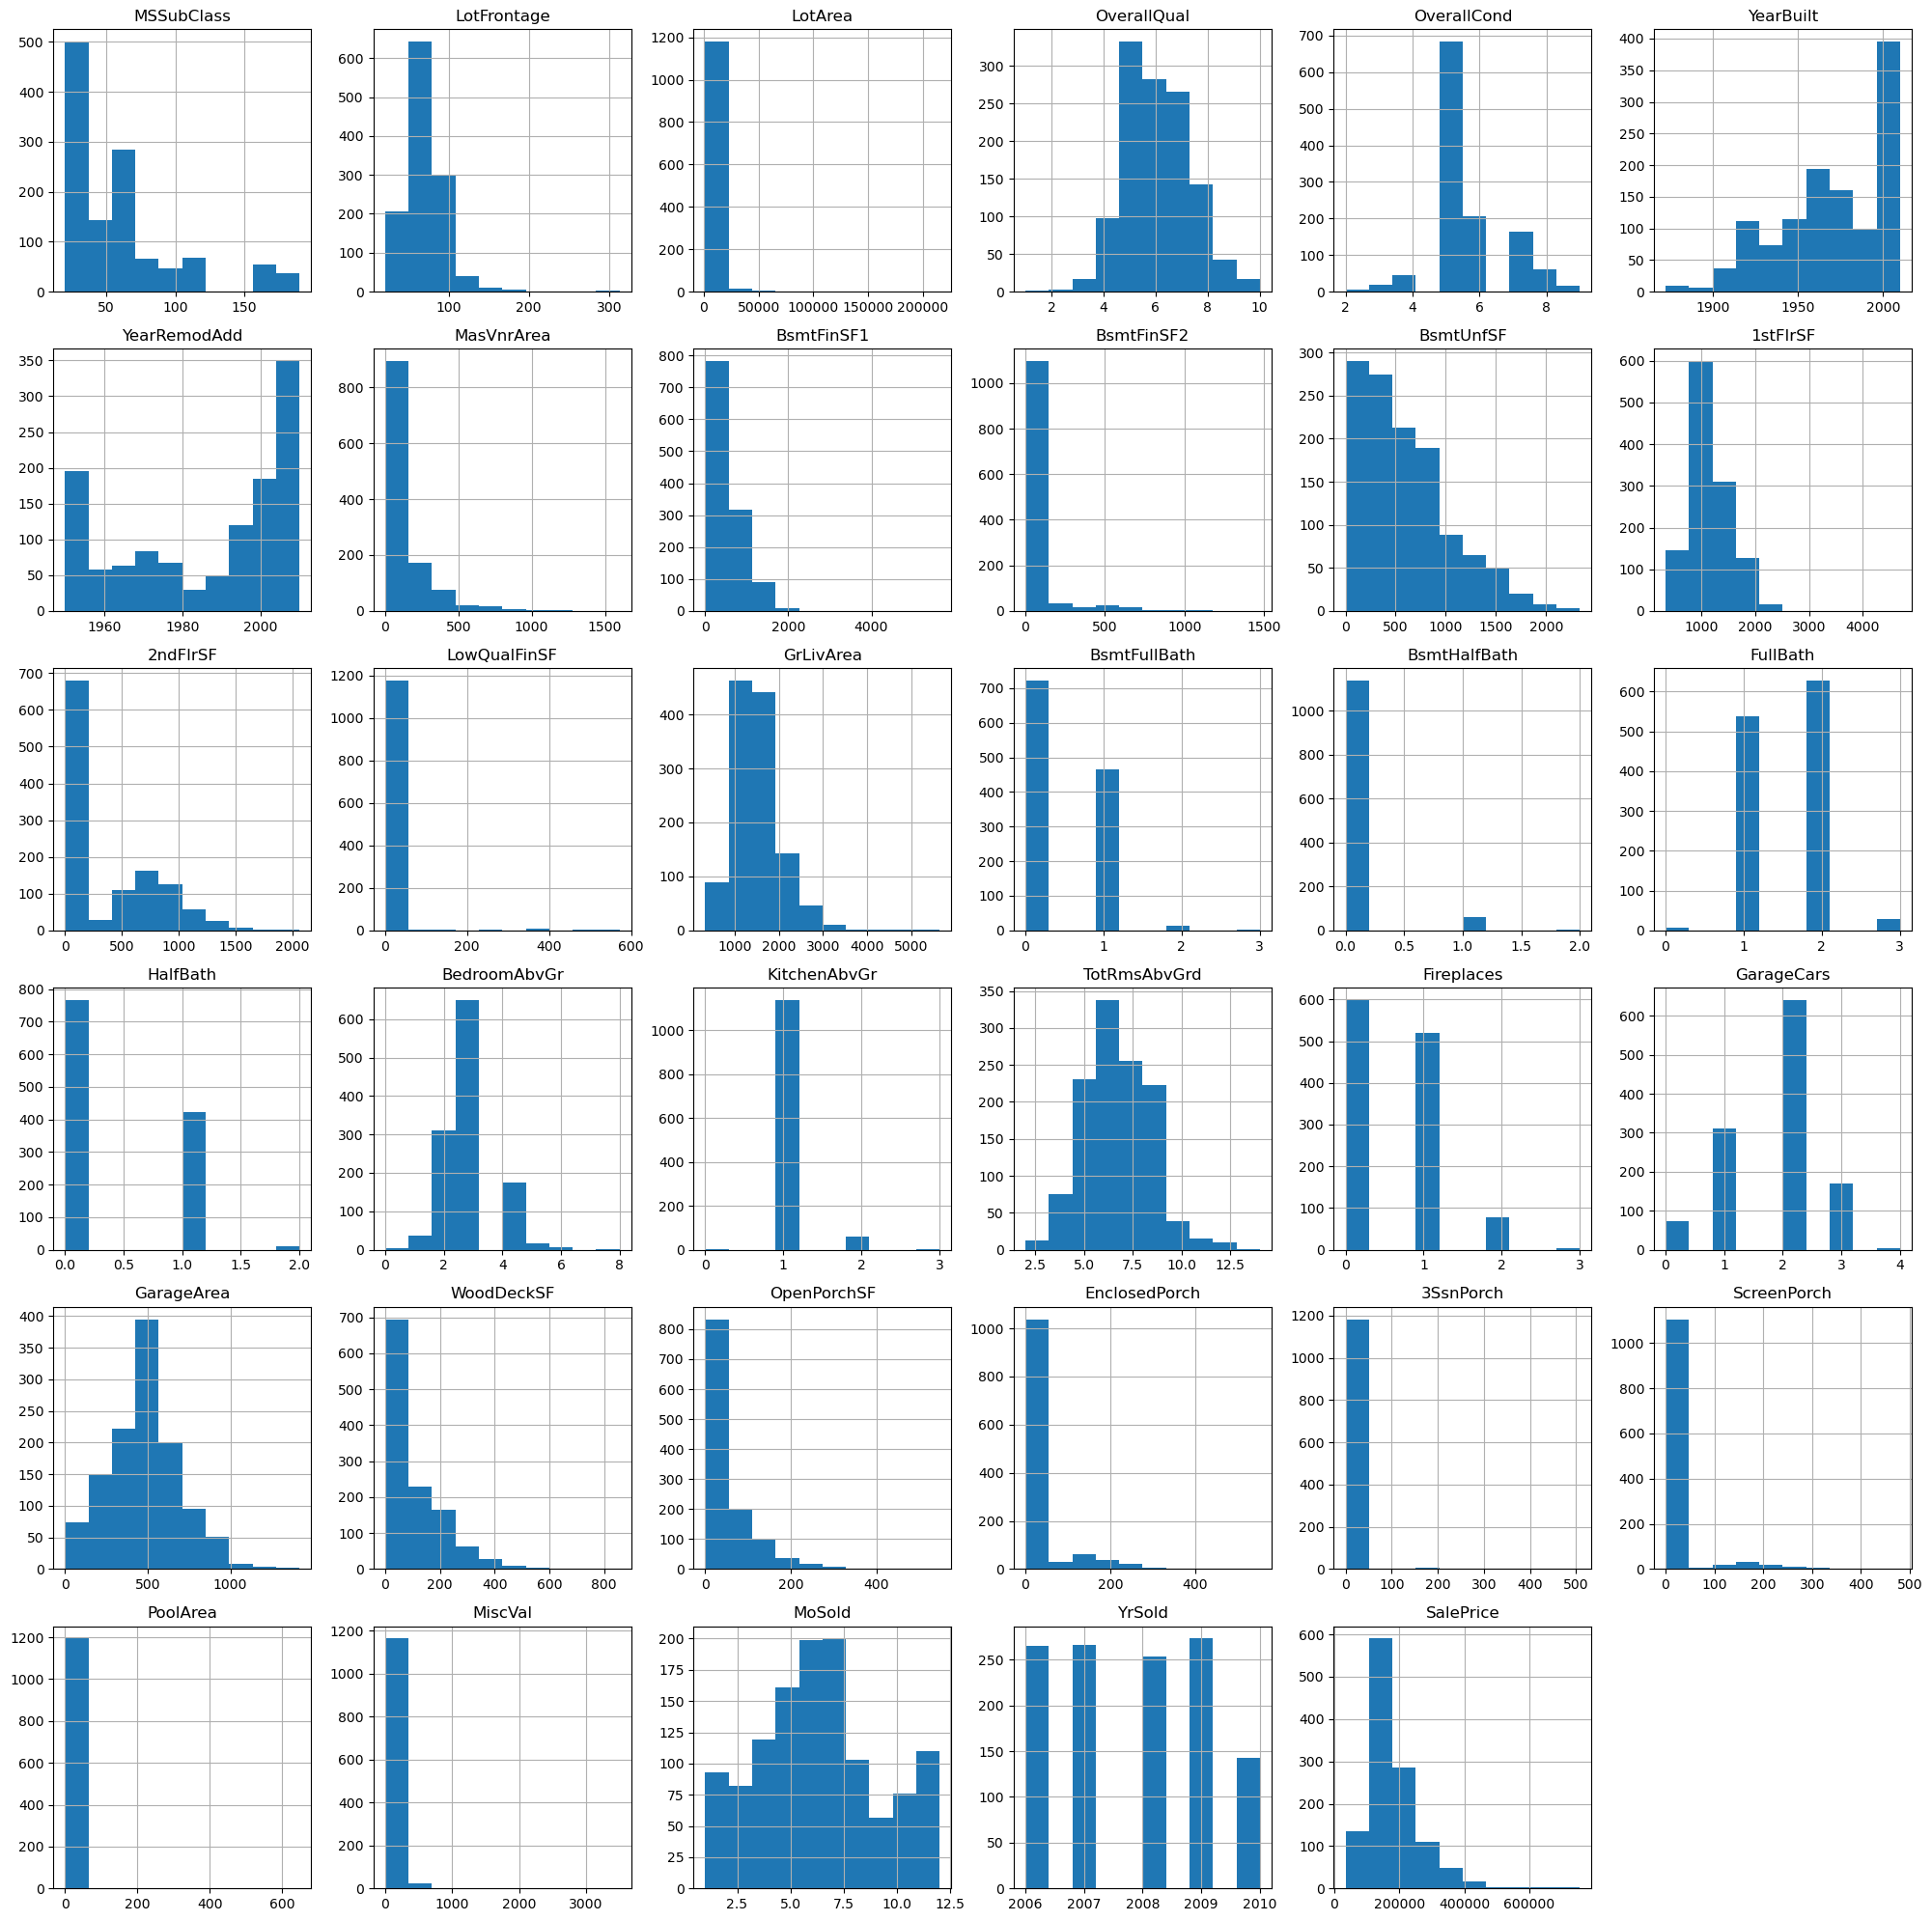

In [21]:
df.hist(figsize=(20, 20));
plt.tight_layout();

In [22]:
columns_to_work_on = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','LowQualFinSF','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
# Let's find the number of rows under 95 percentile for each of these columns
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.95)
    print(column,len(df[(df[column] < q_hi)]))

LotArea 1140
MasVnrArea 1134
BsmtFinSF1 1140
BsmtFinSF2 1140
LowQualFinSF 0
WoodDeckSF 1139
OpenPorchSF 1139
EnclosedPorch 1140
3SsnPorch 0
ScreenPorch 1140
PoolArea 0
MiscVal 0


Lets deal with the null values now

# Poolarea

In [23]:
df[df.PoolArea>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
197           75       RL        174.0    25419   Pave      Reg         Lvl   
810           20       RL         78.0    10140   Pave      Reg         Lvl   
1170          80       RL         76.0     9880   Pave      Reg         Lvl   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   
1298          60       RL        313.0    63887   Pave      IR3         Bnk   
1386          60       RL         80.0    16692   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  Fence  \
197     AllPub    Corner       Gtl  ...         0           0      512  GdPrv   
810     AllPub    Inside       Gtl  ...         0           0      648  GdPrv   
1170    AllPub    Inside       Gtl  ...         0           0      576  GdPrv   
1182    AllPub    Corner       Gtl  ...         0           0      555  MnPrv   
1298    AllPub    Corner       Gtl  ...         0           0      480    NaN   
1386    AllPub    Inside       Gtl  ...         0         440      519  MnPrv   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
197        0       3    2006        WD        Abnorml    235000  
810        0       1    2006        WD         Normal    181000  
1170       0       7    2008        WD         Normal    171000  
1182       0       7    2007        WD        Abnorml    745000  
1298       0       1    2008       New        Partial    160000  
1386    2000       7    2006        WD         Normal    250000  

[6 rows x 75 columns]

In [24]:
df.drop(['PoolArea'],axis=1,inplace=True)

# LowQualFinSF 

In [25]:
df[df.LowQualFinSF>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
51            50       RM         52.0     6240   Pave      Reg         Lvl   
88            50  C (all)        105.0     8470   Pave      IR1         Lvl   
125          190       RM         60.0     6780   Pave      Reg         Lvl   
185           75       RM         90.0    22950   Pave      IR2         Lvl   
187           50       RL         60.0    10410   Pave      Reg         Lvl   
197           75       RL        174.0    25419   Pave      Reg         Lvl   
198           75       RM         92.0     5520   Pave      Reg         Lvl   
263           50       RM         50.0     5500   Pave      Reg         Lvl   
267           75       RL         60.0     8400   Pave      Reg         Bnk   
406           50       RL         51.0    10480   Pave      Reg         Lvl   
589           40       RM         50.0     9100   Pave      Reg         Lvl   
635          190       RH         60.0    10896   Pave      Reg         Bnk   
729           30       RM         52.0     6240   Pave      Reg         Lvl   
829          160       FV         24.0     2544   Pave      Reg         Lvl   
831          160       FV         30.0     3180   Pave      Reg         Lvl   
873           40       RL         60.0    12144   Pave      Reg         Lvl   
883           75       RL         60.0     6204   Pave      Reg         Bnk   
945           50       RM         98.0     8820   Pave      Reg         Lvl   
1009          50       RL         60.0     6000   Pave      Reg         Lvl   
1031          75       RL        102.0    15863   Pave      Reg         Lvl   
1173          50       RL        138.0    18030   Pave      IR1         Bnk   
1349          70       RM         50.0     5250   Pave      Reg         Lvl   
1364         160       FV         30.0     3180   Pave      Reg         Lvl   
1440          70       RL         79.0    11526   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
51      AllPub    Inside       Gtl  ...             0         0           0   
88      AllPub    Corner       Gtl  ...           156         0           0   
125     AllPub    Inside       Gtl  ...             0         0           0   
185     AllPub    Inside       Gtl  ...             0         0         410   
187     AllPub    Inside       Gtl  ...             0       140           0   
197     AllPub    Corner       Gtl  ...           552         0           0   
198     AllPub    Corner       Gtl  ...            30         0           0   
263     AllPub    Corner       Gtl  ...             0         0           0   
267     AllPub    Inside       Mod  ...             0         0           0   
406     AllPub    Inside       Gtl  ...             0         0           0   
589     AllPub    Inside       Gtl  ...             0         0           0   
635     AllPub    Inside       Gtl  ...             0         0           0   
729     AllPub    Inside       Gtl  ...           112         0           0   
829     AllPub    Inside       Gtl  ...             0         0           0   
831     AllPub    Inside       Gtl  ...             0         0           0   
873     AllPub    Inside       Gtl  ...             0         0           0   
883     AllPub    Inside       Gtl  ...             0         0           0   
945     AllPub    Corner       Gtl  ...           244         0           0   
1009    AllPub    Inside       Gtl  ...           138         0           0   
1031    AllPub    Corner       Gtl  ...             0         0           0   
1173    AllPub    Inside       Gtl  ...             0         0           0   
1349    AllPub    Inside       Gtl  ...            20         0           0   
1364    AllPub    Inside       Gtl  ...             0         0           0   
1440    AllPub    Inside       Mod  ...             0         0           0   

      Fence MiscVal  MoSold  YrSold  SaleType  SaleCon

In [26]:
df.drop(['LowQualFinSF'],axis=1,inplace=True)

# 3SsnPorch

In [27]:
df[df['3SsnPorch']>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5             50       RL         85.0    14115   Pave      IR1         Lvl   
55            20       RL        100.0    10175   Pave      IR1         Lvl   
129           20       RL         69.0     8973   Pave      Reg         Lvl   
159           60       RL        134.0    19378   Pave      IR1         HLS   
182           20       RL         60.0     9060   Pave      Reg         Lvl   
187           50       RL         60.0    10410   Pave      Reg         Lvl   
205           20       RL         99.0    11851   Pave      Reg         Lvl   
258           60       RL         80.0    12435   Pave      Reg         Lvl   
280           60       RL         82.0    11287   Pave      Reg         Lvl   
546           50       RL         70.0     8737   Pave      IR1         Bnk   
704           20       RL         70.0     8400   Pave      Reg         Lvl   
744          120       RL         41.0     5395   Pave      IR1         HLS   
889           20       RL        128.0    12160   Pave      Reg         Lvl   
922           20       RL         65.0    10237   Pave      Reg         Lvl   
1080          20       RL         80.0    11040   Pave      Reg         Lvl   
1156          80       RL         85.0     9350   Pave      Reg         Lvl   
1181         120       RM         64.0     5587   Pave      IR1         HLS   
1437          20       RL         96.0    12444   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
5       AllPub    Inside       Gtl  ...             0       320           0   
55      AllPub    Inside       Gtl  ...             0       407           0   
129     AllPub    Inside       Gtl  ...             0       180           0   
159     AllPub    Corner       Gtl  ...             0       168           0   
182     AllPub    Inside       Gtl  ...             0       180           0   
187     AllPub    Inside       Gtl  ...             0       140           0   
205     AllPub    Corner       Gtl  ...             0       508           0   
258     AllPub    Inside       Gtl  ...             0       245           0   
280     AllPub    Inside       Gtl  ...             0       196           0   
546     AllPub    Inside       Gtl  ...             0       144           0   
704     AllPub    Inside       Gtl  ...             0       144           0   
744     AllPub    Inside       Gtl  ...            70       168           0   
889     AllPub    Inside       Gtl  ...             0       162           0   
922     AllPub    Inside       Gtl  ...             0        23           0   
1080    AllPub    Inside       Gtl  ...             0       216           0   
1156    AllPub    Inside       Gtl  ...             0        96           0   
1181    AllPub    Inside       Mod  ...             0       153           0   
1437    AllPub       FR2       Gtl  ...             0       304           0   

      Fence MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
5     MnPrv     700      10    2009        WD         Normal    143000  
55      NaN       0       7    2008        WD         Normal    180500  
129    MnWw       0       7    2006        WD        Abnorml    150000  
159     NaN       0       3    2006       New        Partial    320000  
182   MnPrv       0       6    2007        WD         Normal    120000  
187   MnPrv       0       8    2009        WD         Normal    135000  
205     NaN       0       5    2009        WD         Normal    180500  
258     NaN       0       5    2008        WD         Normal    231500  
280     NaN       0       1    2007        WD         Normal    228500  
546     NaN       0       5    2007        WD         Normal    210000  
704     NaN       0       5    2010        WD         Normal    213000  
744     NaN       0      10    2008        WD         Normal    180000  
889     NaN       0       2    2009        WD        

Since only 24 rows have nonzero LowQualFinSF, we can just remove the column

In [28]:
df.drop(['3SsnPorch'],axis=1,inplace=True)

# MiscVal

In [29]:
df[df.MiscVal>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5             50       RL         85.0    14115   Pave      IR1         Lvl   
17            90       RL         72.0    10791   Pave      Reg         Lvl   
51            50       RM         52.0     6240   Pave      Reg         Lvl   
98            30       RL         85.0    10625   Pave      Reg         Lvl   
99            20       RL         77.0     9320   Pave      IR1         Lvl   
106           30       RM         60.0    10800   Pave      Reg         Lvl   
250           30       RL         55.0     5350   Pave      IR1         Lvl   
338           20       RL         91.0    14145   Pave      Reg         Lvl   
439           50       RL         67.0    12354   Pave      Reg         Lvl   
499           20       RL         70.0     7535   Pave      IR1         Lvl   
502           20       RL         70.0     9170   Pave      Reg         Lvl   
510           20       RL         75.0    14559   Pave      Reg         Lvl   
589           40       RM         50.0     9100   Pave      Reg         Lvl   
634           90       RL         64.0     6979   Pave      Reg         Lvl   
705          190       RM         70.0     5600   Pave      Reg         Lvl   
725           20       RL         60.0     6960   Pave      Reg         Lvl   
733           20       RL         80.0    10000   Pave      Reg         Lvl   
760           20       RL         70.0     9100   Pave      Reg         Lvl   
766           60       RL         80.0    10421   Pave      Reg         Lvl   
767           50       RL         75.0    12508   Pave      IR1         Lvl   
786           50       RM         60.0    10800   Pave      Reg         Lvl   
800           60       RL         79.0    12798   Pave      IR1         HLS   
812           20  C (all)         66.0     8712   Grvl      Reg         Bnk   
813           20       RL         75.0     9750   Pave      Reg         Lvl   
867           20       RL         85.0     6970   Pave      Reg         Lvl   
878           85       RL         88.0    11782   Pave      IR1         Lvl   
890           50       RL         60.0     8064   Pave      Reg         Lvl   
912           30       RM         51.0     6120   Pave      Reg         Lvl   
1061          30  C (all)        120.0    18000   Grvl      Reg         Low   
1076          50       RL         60.0    10800   Pave      Reg         Lvl   
1083          20       RL         80.0     8800   Pave      Reg         Lvl   
1171          20       RL         76.0     9120   Pave      Reg         Lvl   
1210          60       RL         70.0    11218   Pave      Reg         Lvl   
1252          20       RL         62.0     9858   Pave      Reg         Lvl   
1328          50       RM         60.0    10440   Pave      Reg         Lvl   
1386          60       RL         80.0    16692   Pave      IR1         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch ScreenPorch  \
5       AllPub    Inside       Gtl  ...          30             0           0   
17      AllPub    Inside       Gtl  ...           0             0           0   
51      AllPub    Inside       Gtl  ...           0             0           0   
98      AllPub    Corner       Gtl  ...           0            77           0   
99      AllPub    Inside       Gtl  ...           0             0           0   
106     AllPub    Inside       Gtl  ...           0             0           0   
250     AllPub    Inside       Gtl  ...           0             0           0   
338     AllPub    Corner       Gtl  ...          45             0           0   
439     AllPub    Corner       Gtl  ...          46             0           0   
499     AllPub    Inside       Gtl  ...         285             0           0   
502     AllPub    Corner       Gtl  ...           0           184           0   
510     AllPub    Inside       

In [30]:
df.drop(['MiscVal'],axis=1,inplace=True)

In [31]:
columns_to_work_on = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','ScreenPorch']
# Let's find the number of rows under 95 percentile for each of these columns
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.99)
    print(column,len(df[(df[column] < q_hi)]))

LotArea 1188
MasVnrArea 1182
BsmtFinSF1 1188
BsmtFinSF2 1188
WoodDeckSF 1188
OpenPorchSF 1188
EnclosedPorch 1188
ScreenPorch 1188


In [32]:
#Looks good. We can now drop the outlier rows
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.99)
    df = df[(df[column] < q_hi)]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1457
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1098 non-null   int64  
 1   MSZoning       1098 non-null   object 
 2   LotFrontage    1098 non-null   float64
 3   LotArea        1098 non-null   int64  
 4   Street         1098 non-null   object 
 5   LotShape       1098 non-null   object 
 6   LandContour    1098 non-null   object 
 7   Utilities      1098 non-null   object 
 8   LotConfig      1098 non-null   object 
 9   LandSlope      1098 non-null   object 
 10  Neighborhood   1098 non-null   object 
 11  Condition1     1098 non-null   object 
 12  Condition2     1098 non-null   object 
 13  BldgType       1098 non-null   object 
 14  HouseStyle     1098 non-null   object 
 15  OverallQual    1098 non-null   int64  
 16  OverallCond    1098 non-null   int64  
 17  YearBuilt      1098 non-null   int64  
 18  YearRemo

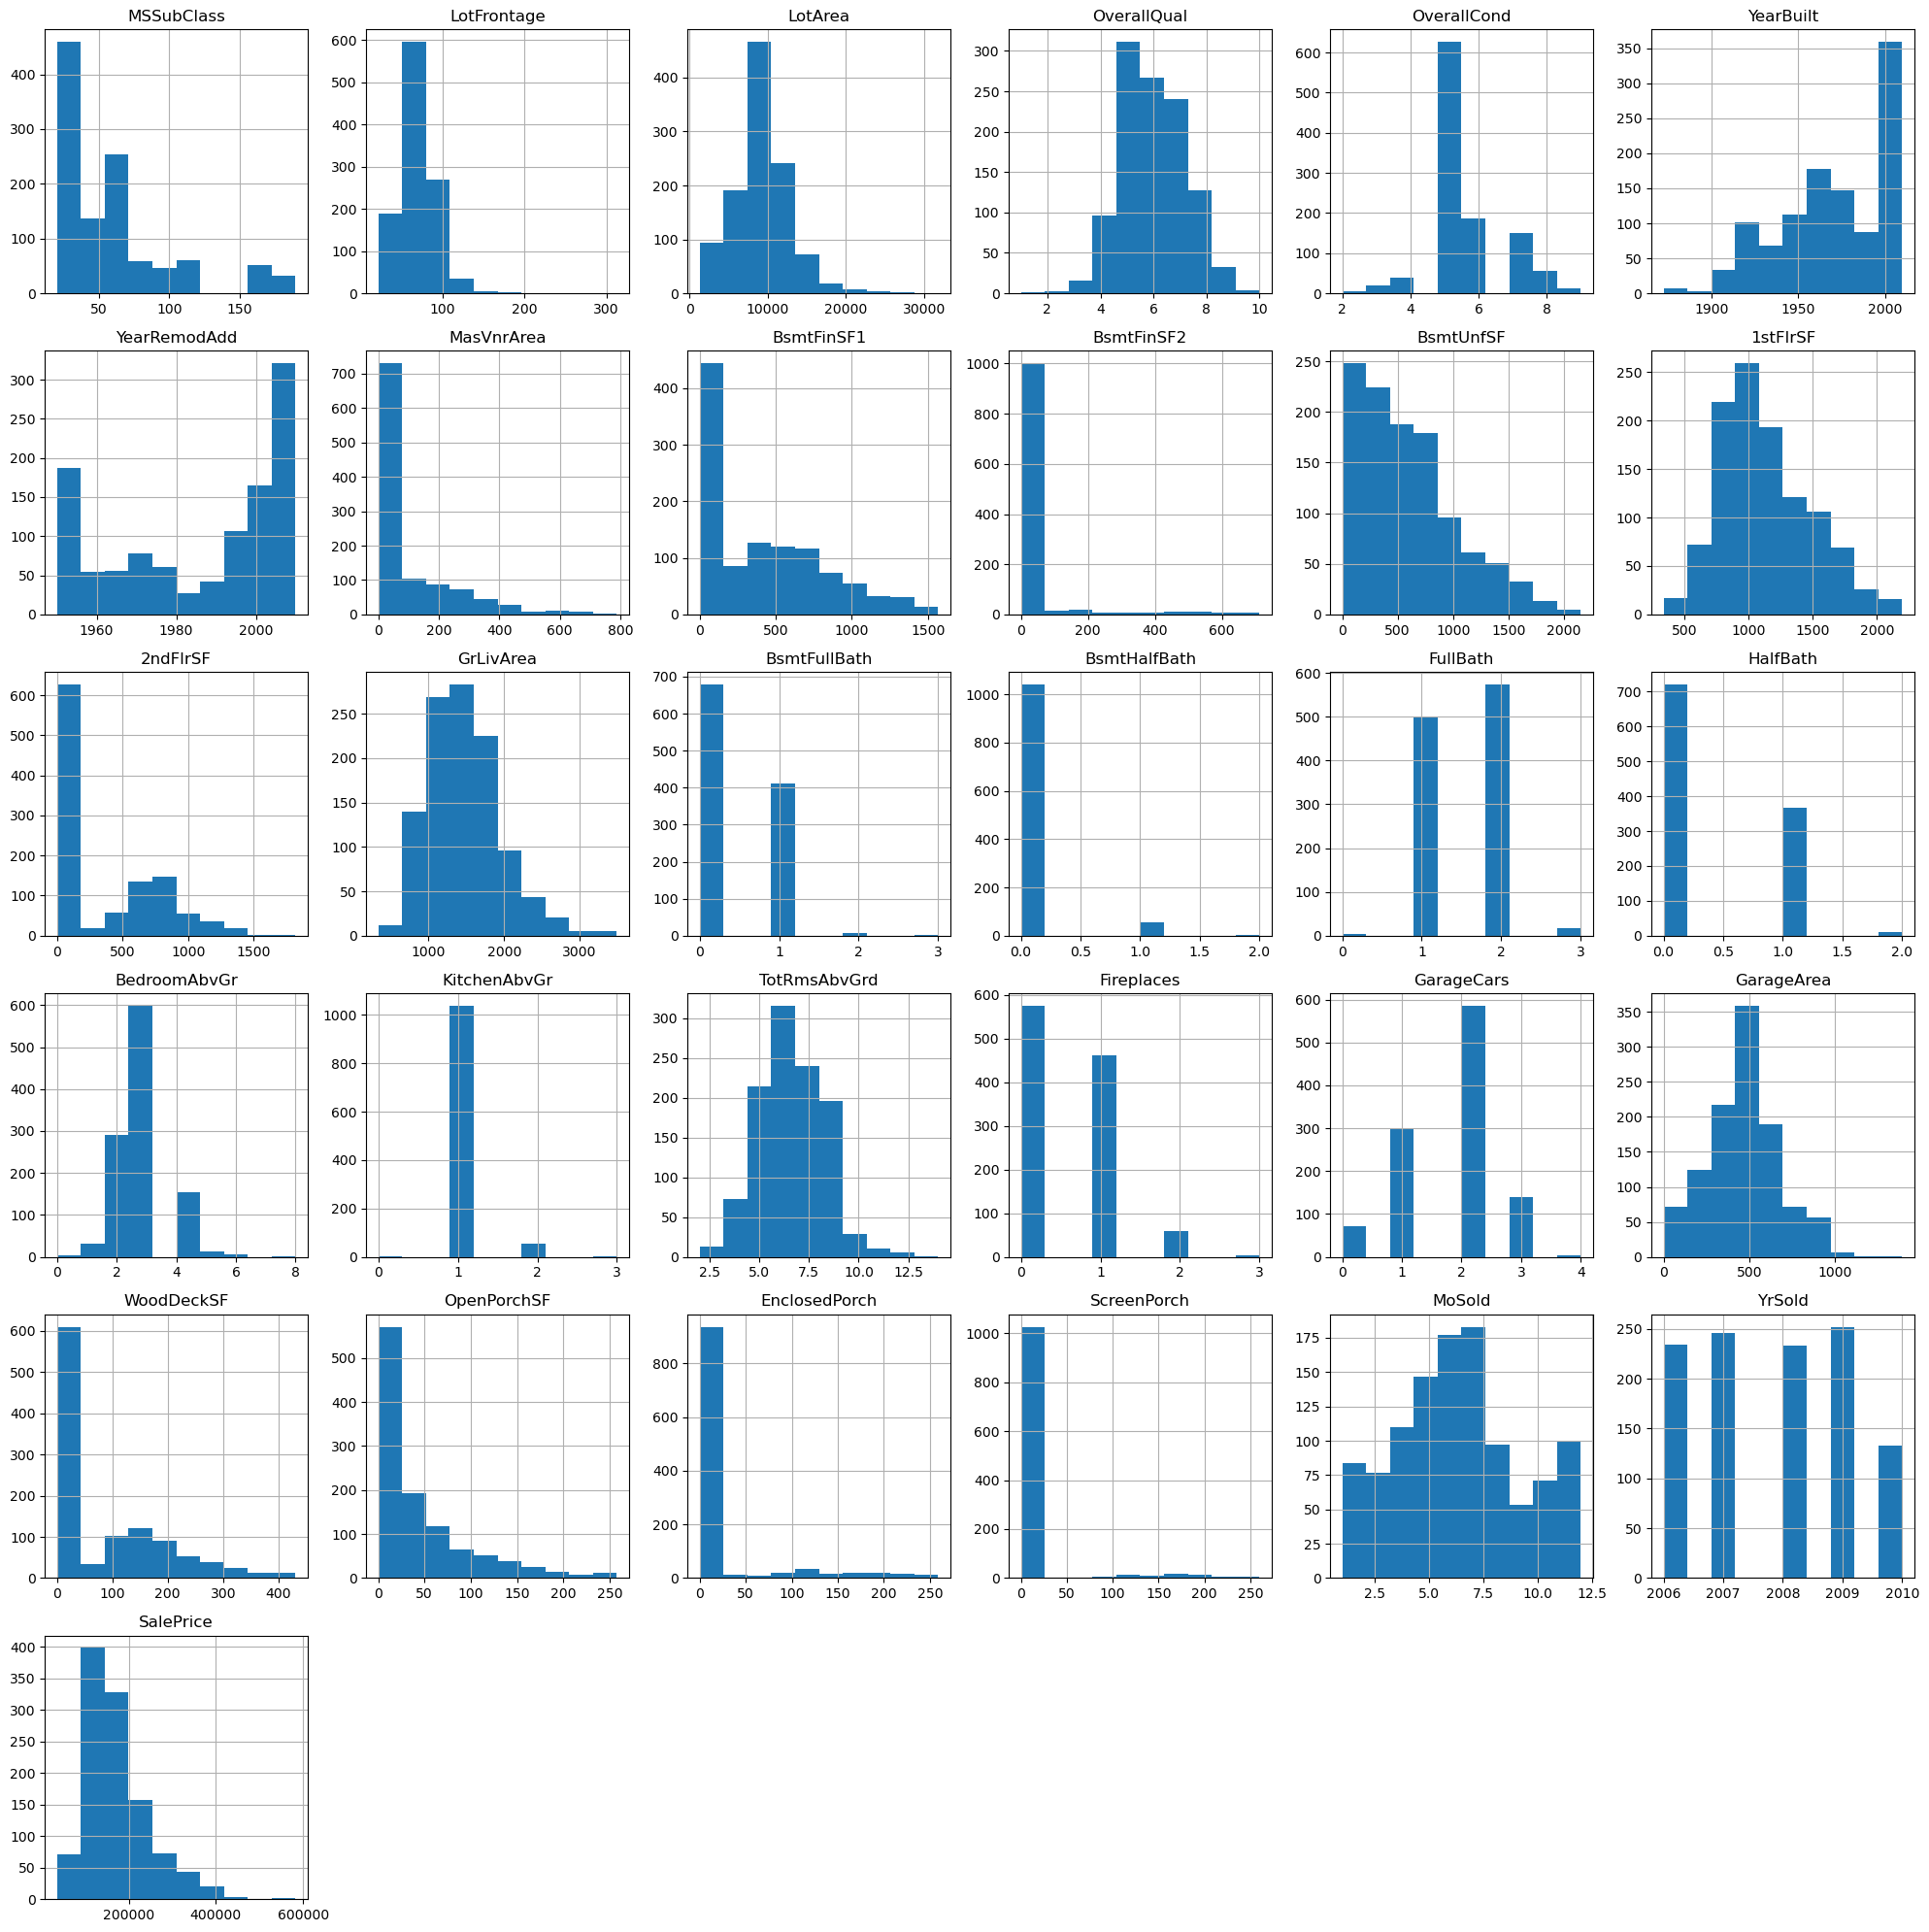

In [34]:
df.hist(figsize=(20, 20));
plt.tight_layout();

C:\Users\Nidhi\AppData\Local\Temp\ipykernel_18592\271047654.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

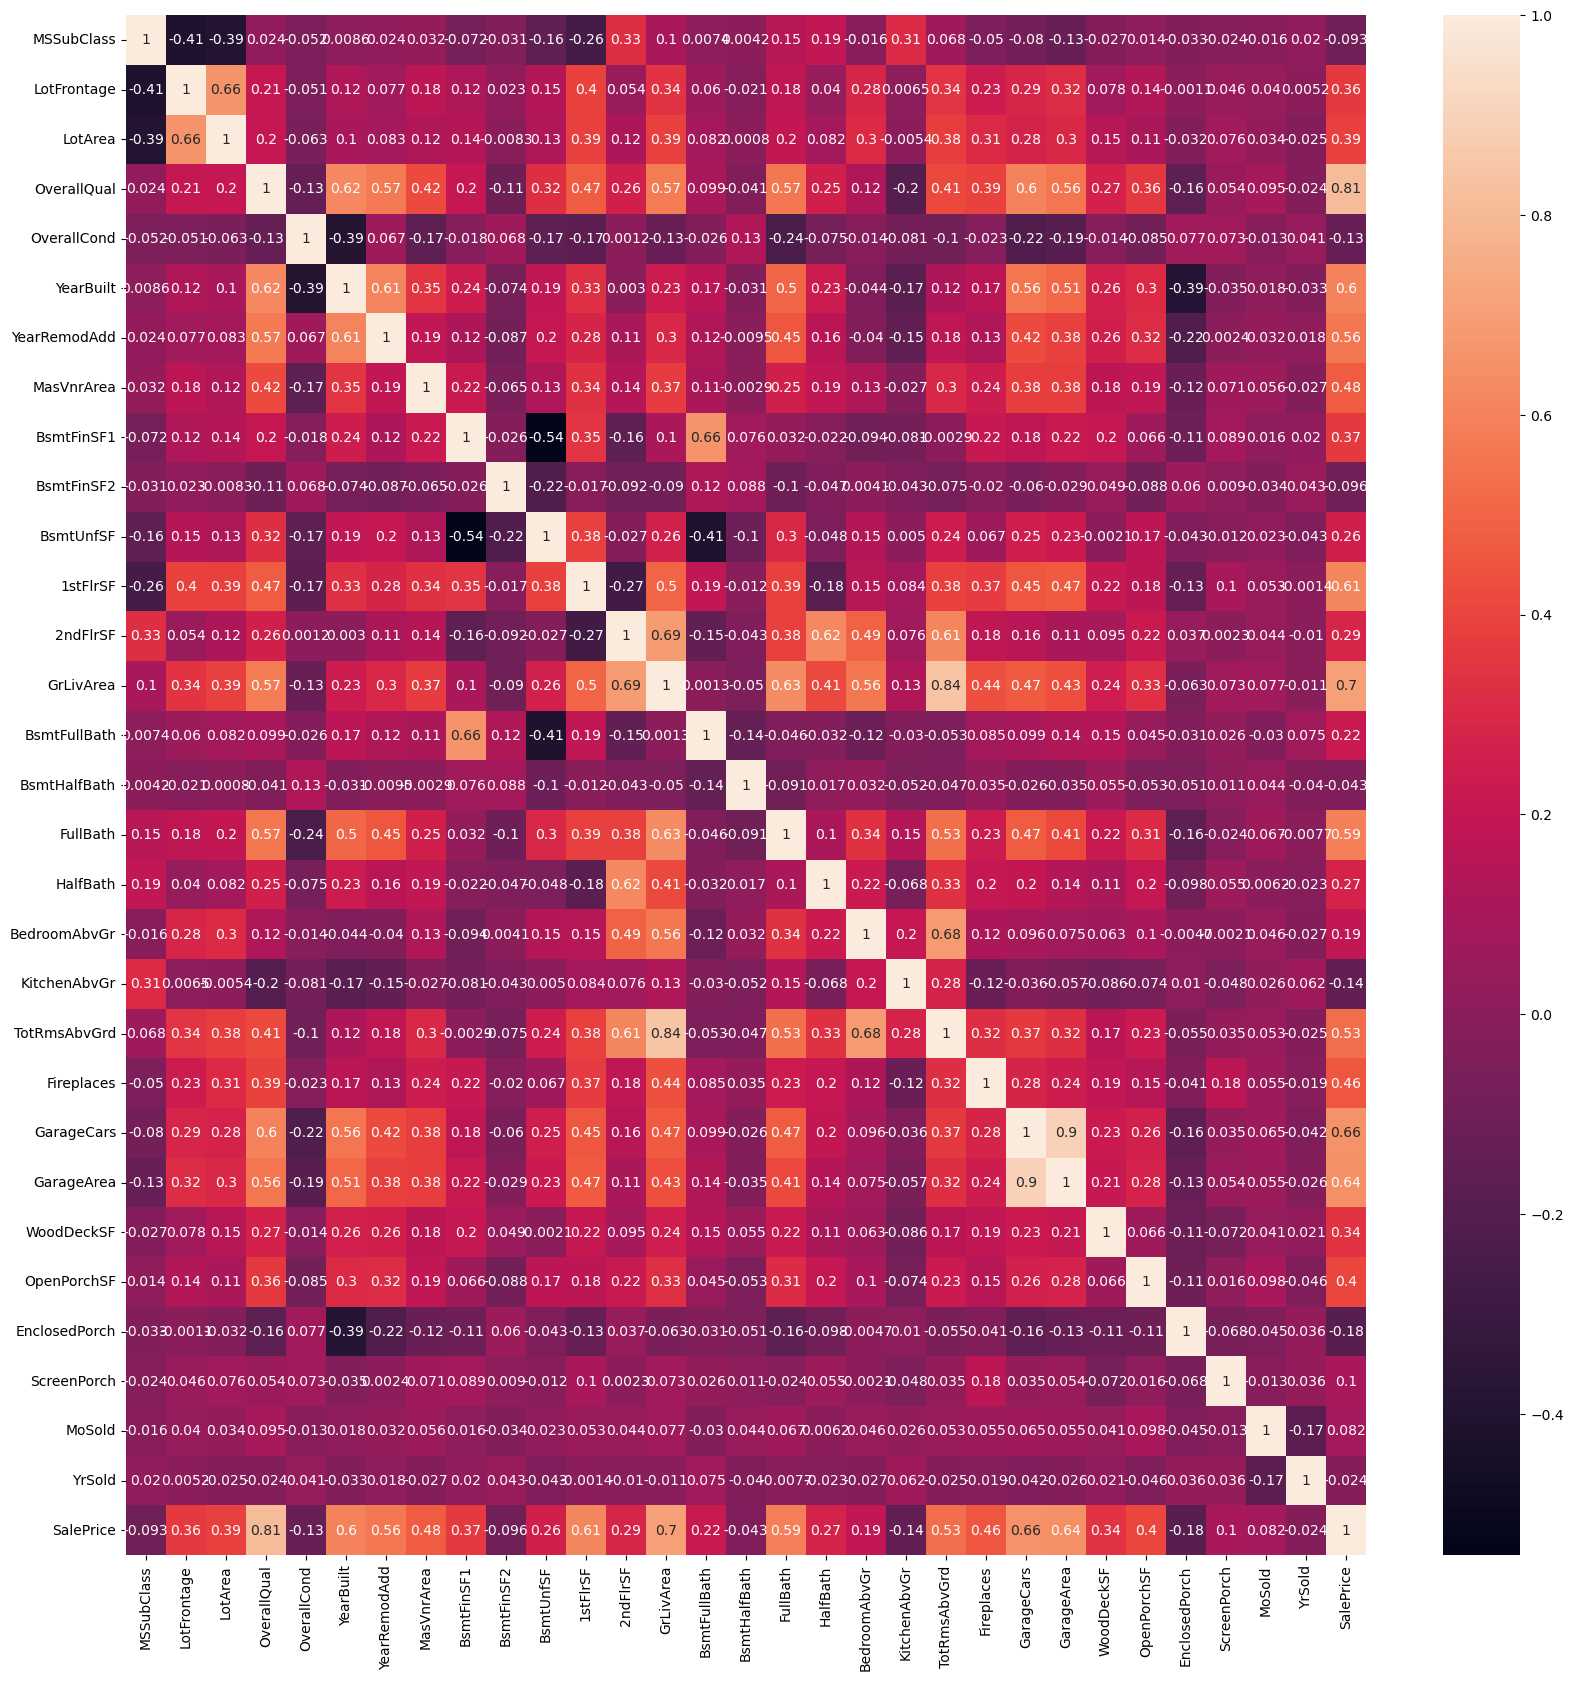

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


Here's the list of strongly correlated terms:

GarageArea - GarageCars: 0.89
TotRmsAbvGrd - GrLivArea: 0.83
We can simply remove one of the pairs. Considering the actual areas would be better owing to their physical significance. So let us drop GarageCars and TotRmsAbvGrd

Text(0, 0.5, 'GrLivArea')

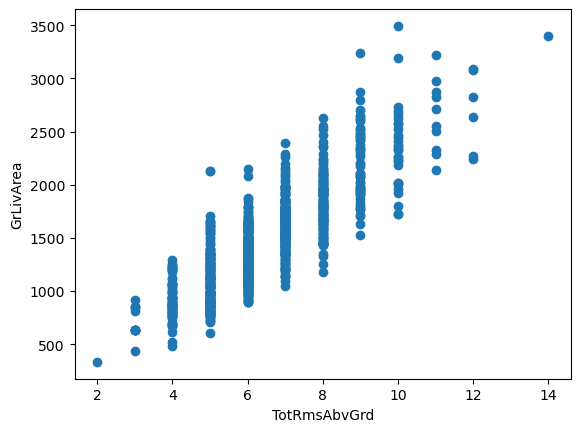

In [36]:
plt.scatter(df.TotRmsAbvGrd,df.GrLivArea)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')

Text(0, 0.5, 'GarageCars')

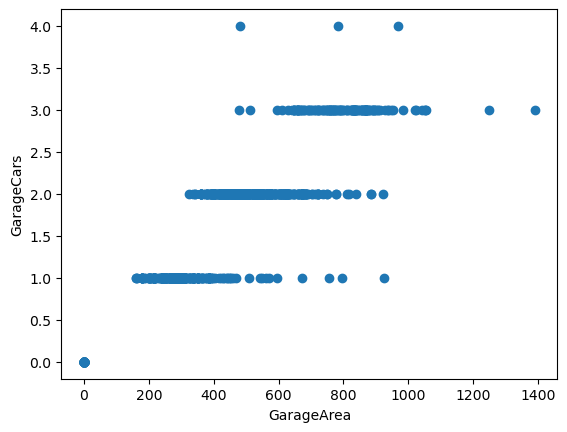

In [37]:
plt.scatter(df.GarageArea,df.GarageCars)
plt.xlabel('GarageArea')
plt.ylabel('GarageCars')

In [38]:
df.drop(['GarageCars','TotRmsAbvGrd'],axis=1,inplace=True)

In [39]:
num_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF',
           'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           'ScreenPorch','MoSold','YrSold','MasVnrArea','SalePrice']
nom_cols = ['MSSubClass','MSZoning','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
            'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
           'Heating','Electrical','Functional','GarageType','SaleType',
           'SaleCondition']
ord_cols = ['Street','LotShape','LandContour','Utilities','LandSlope','ExterQual',
            'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','PavedDrive','Fence']

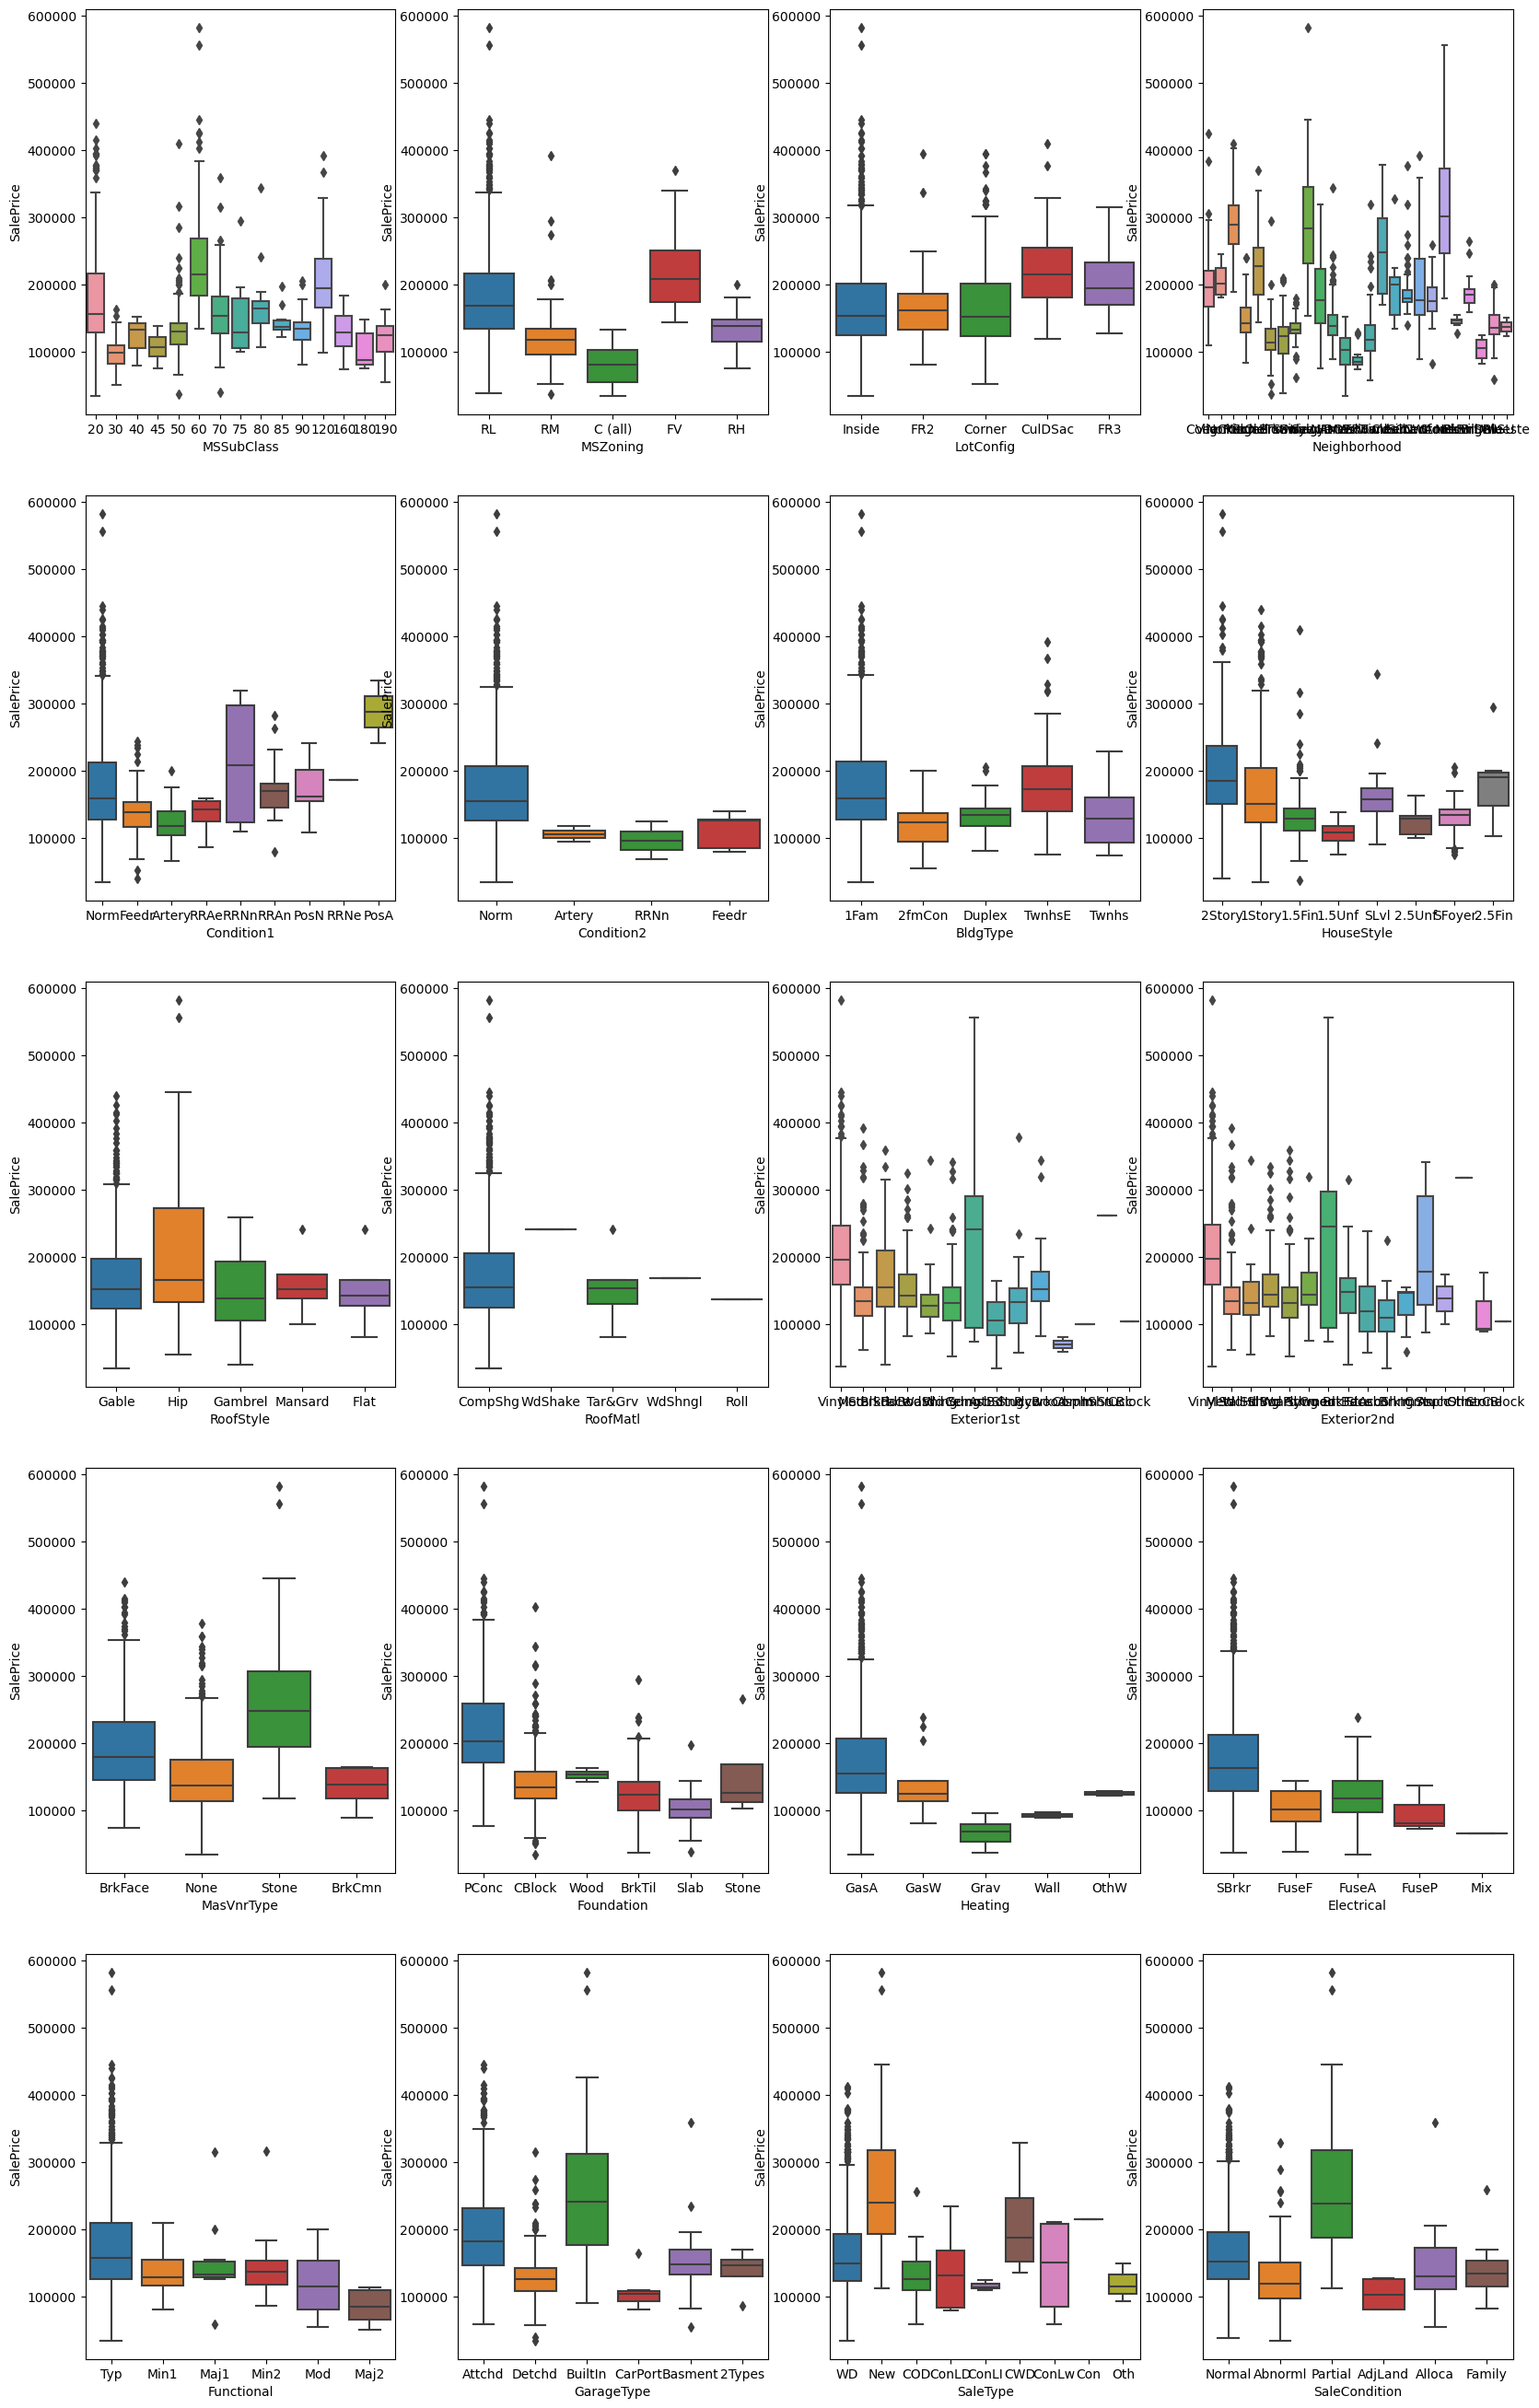

In [40]:
plt.figure(figsize=(20,40))
i = 1
for col in list(nom_cols):
    plt.subplot(len(nom_cols)//4+1,4,i)
    sns.boxplot(data=df, y = 'SalePrice',x = col)
    i+=1
plt.show() 

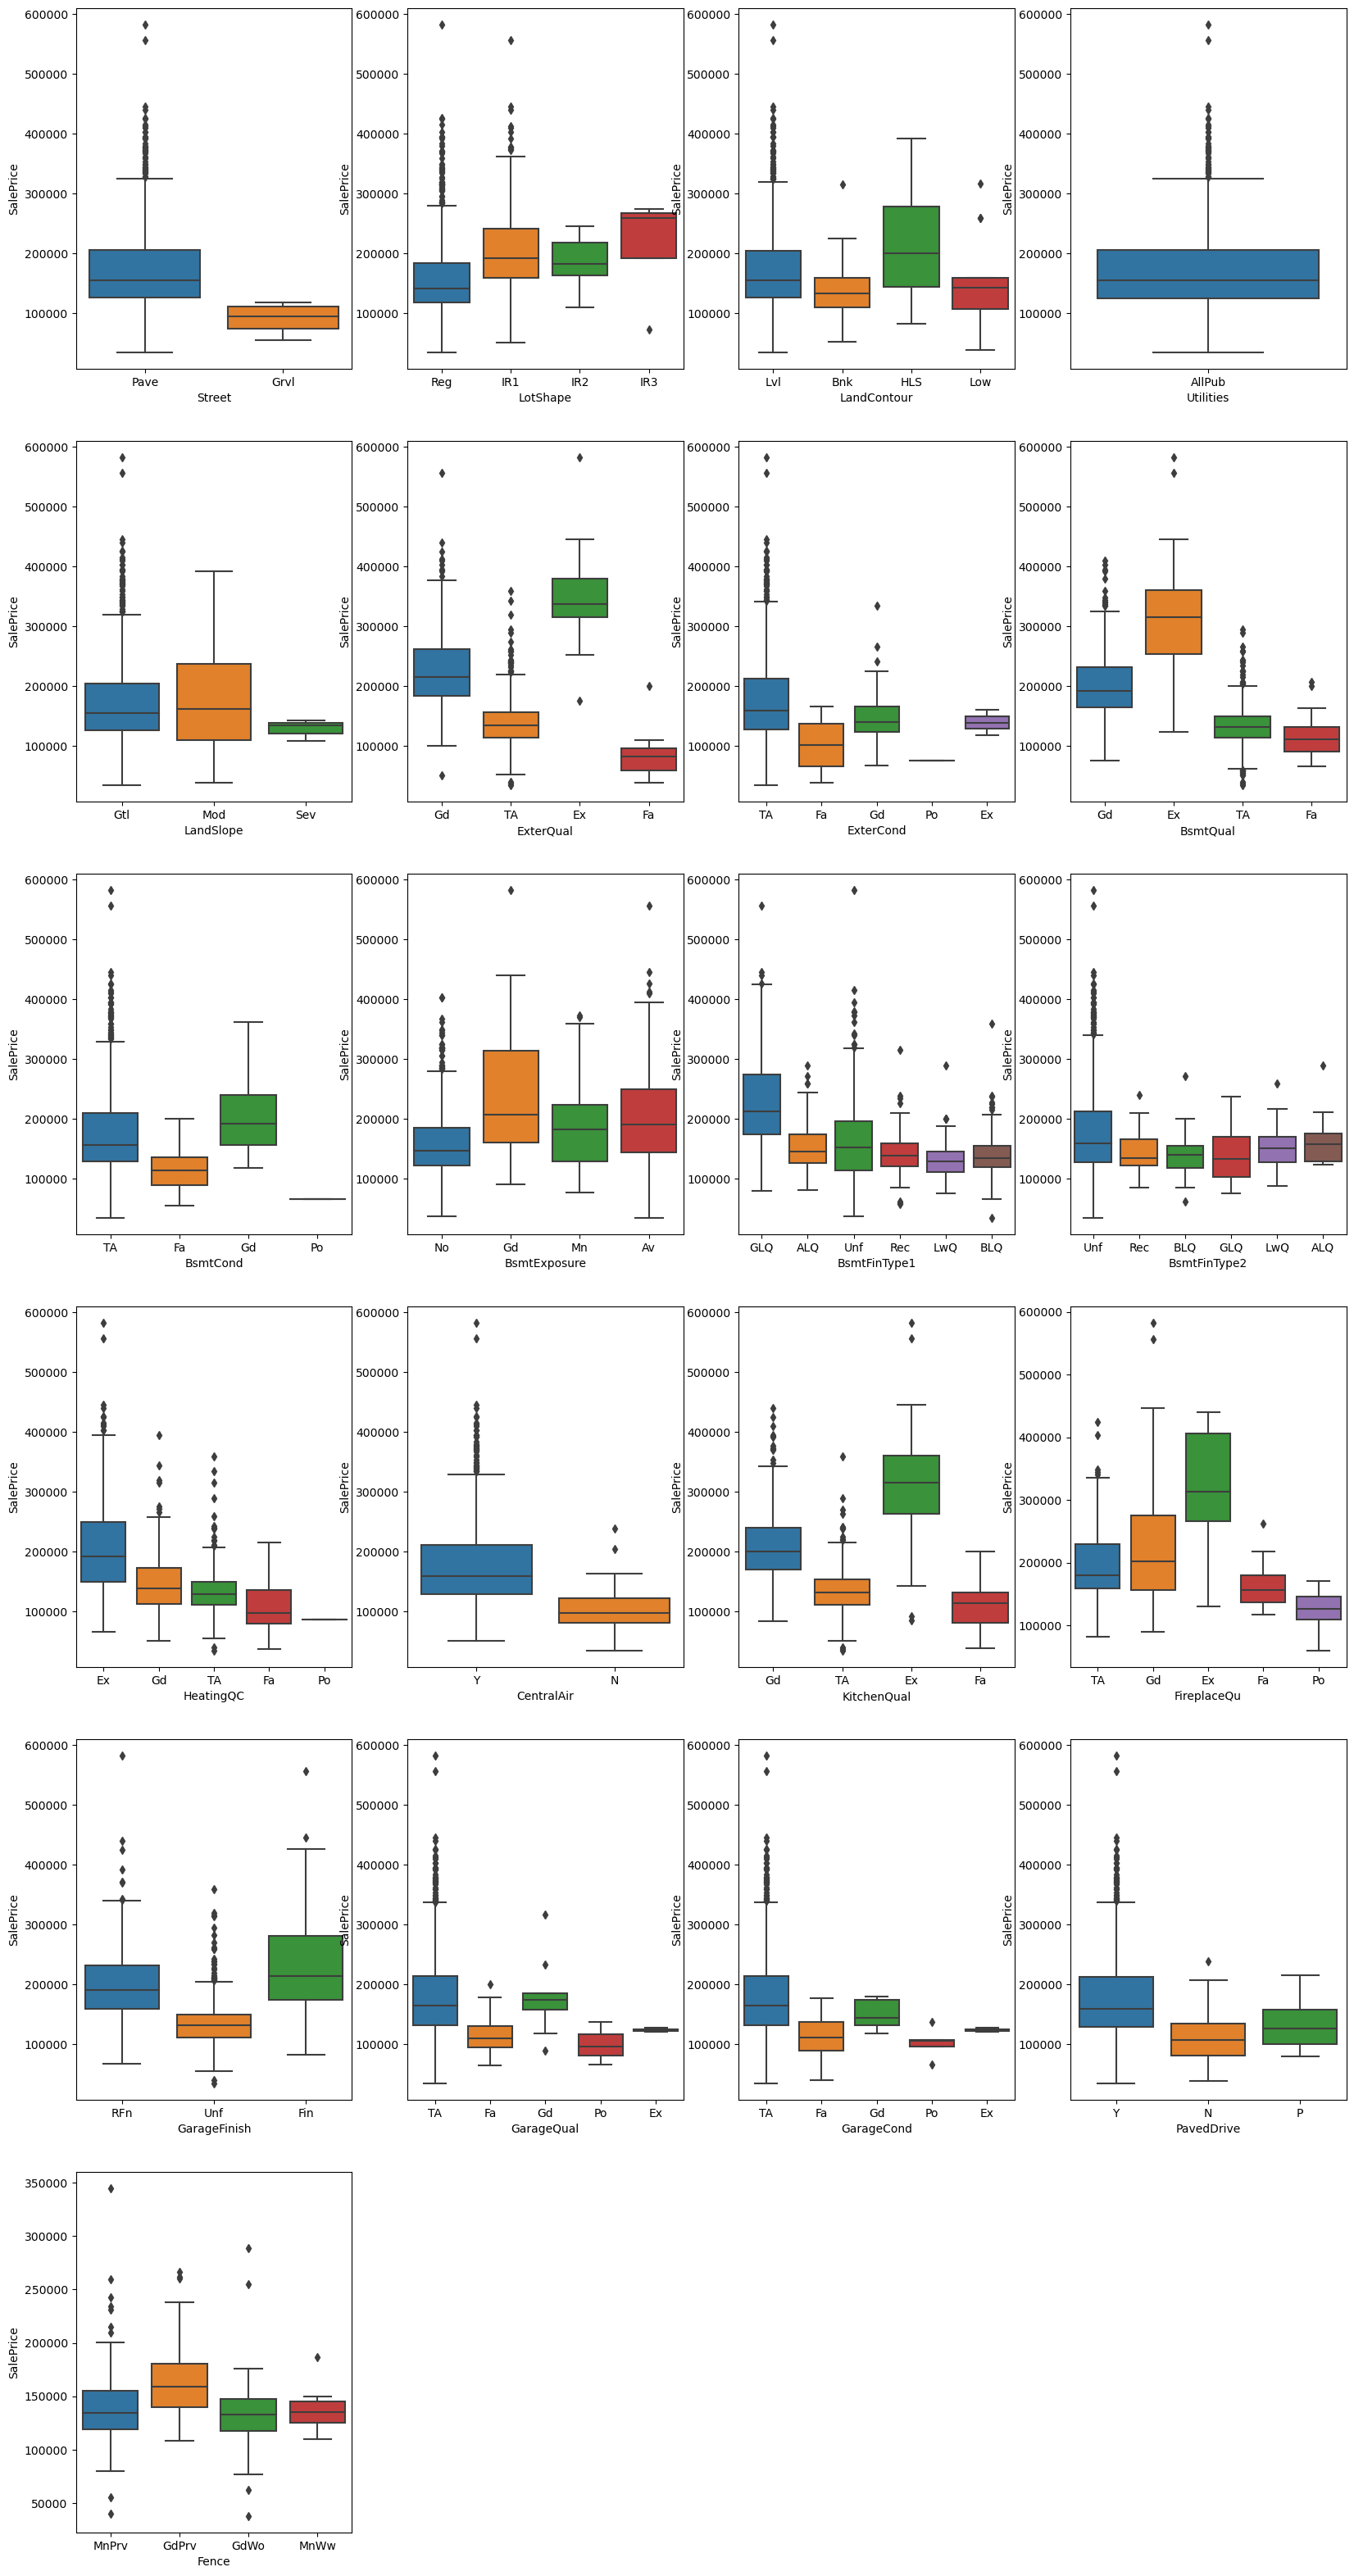

In [41]:
plt.figure(figsize=(20,40))
i = 1
for col in list(ord_cols):
    plt.subplot(len(ord_cols)//4+1,4,i)
    sns.boxplot(data=df, y = 'SalePrice',x = col)
    i+=1
plt.show() 

In [42]:
# All utilities seem to have only one value: AllPub. hence we see we can remove Utilites
df.drop(['Utilities'],axis=1,inplace=True)
ord_cols.remove('Utilities')

# Feature engineering

In [43]:
#Nominal to numeric
#Turn Nominal data into numeric vectors

for col in nom_cols:
    df[col] = df[col].apply(lambda x: col+'_'+str(x))
    status = pd.get_dummies(df[col],drop_first=True)
    df = pd.concat([df,status],axis=1)
    df=df.drop(col,axis=1)

In [44]:
df.head()

LotFrontage  LotArea Street LotShape LandContour LandSlope  OverallQual  \
0         65.0     8450   Pave      Reg         Lvl       Gtl            7   
1         80.0     9600   Pave      Reg         Lvl       Gtl            6   
2         68.0    11250   Pave      IR1         Lvl       Gtl            7   
4         84.0    14260   Pave      IR1         Lvl       Gtl            8   
5         85.0    14115   Pave      IR1         Lvl       Gtl            5   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI SaleType_ConLw  \
0            5       2003          2003  ...               0              0   
1            8       1976          1976  ...               0              0   
2            5       2001          2002  ...               0              0   
4            5       2000          2000  ...               0              0   
5            5       1993          1995  ...               0              0   

  SaleType_New SaleType_Oth SaleType_WD SaleCondition_AdjLand  \
0            0            0           1                     0   
1            0            0           1                     0   
2            0            0           1                     0   
4            0            0           1                     0   
5            0            0           1                     0   

  SaleCondition_Alloca  SaleCondition_Family SaleCondition_Normal  \
0                    0                     0                    1   
1                    0                     0                    1   
2                    0                     0                    1   
4                    0                     0                    1   
5                    0                     0                    1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
4                      0  
5                      0  

[5 rows x 192 columns]

In [45]:
#Ordinal to numeric

In [46]:
# ['Street','LotShape','LandContour','Utilities','LandSlope','ExterQual',
#             'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
#            'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish',
#            'GarageQual','GarageCond','PavedDrive','Fence']
df['Street'] = df.Street.map({'Grvl':0,'Pave':1})
df['LotShape'] = df.LotShape.map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
df['LandContour'] = df.LandContour.map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu'] = df.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['PavedDrive'] = df.PavedDrive.map({'N':0,'P':1,'Y':2})
df['Fence'] = df.Fence.map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

<Axes: >

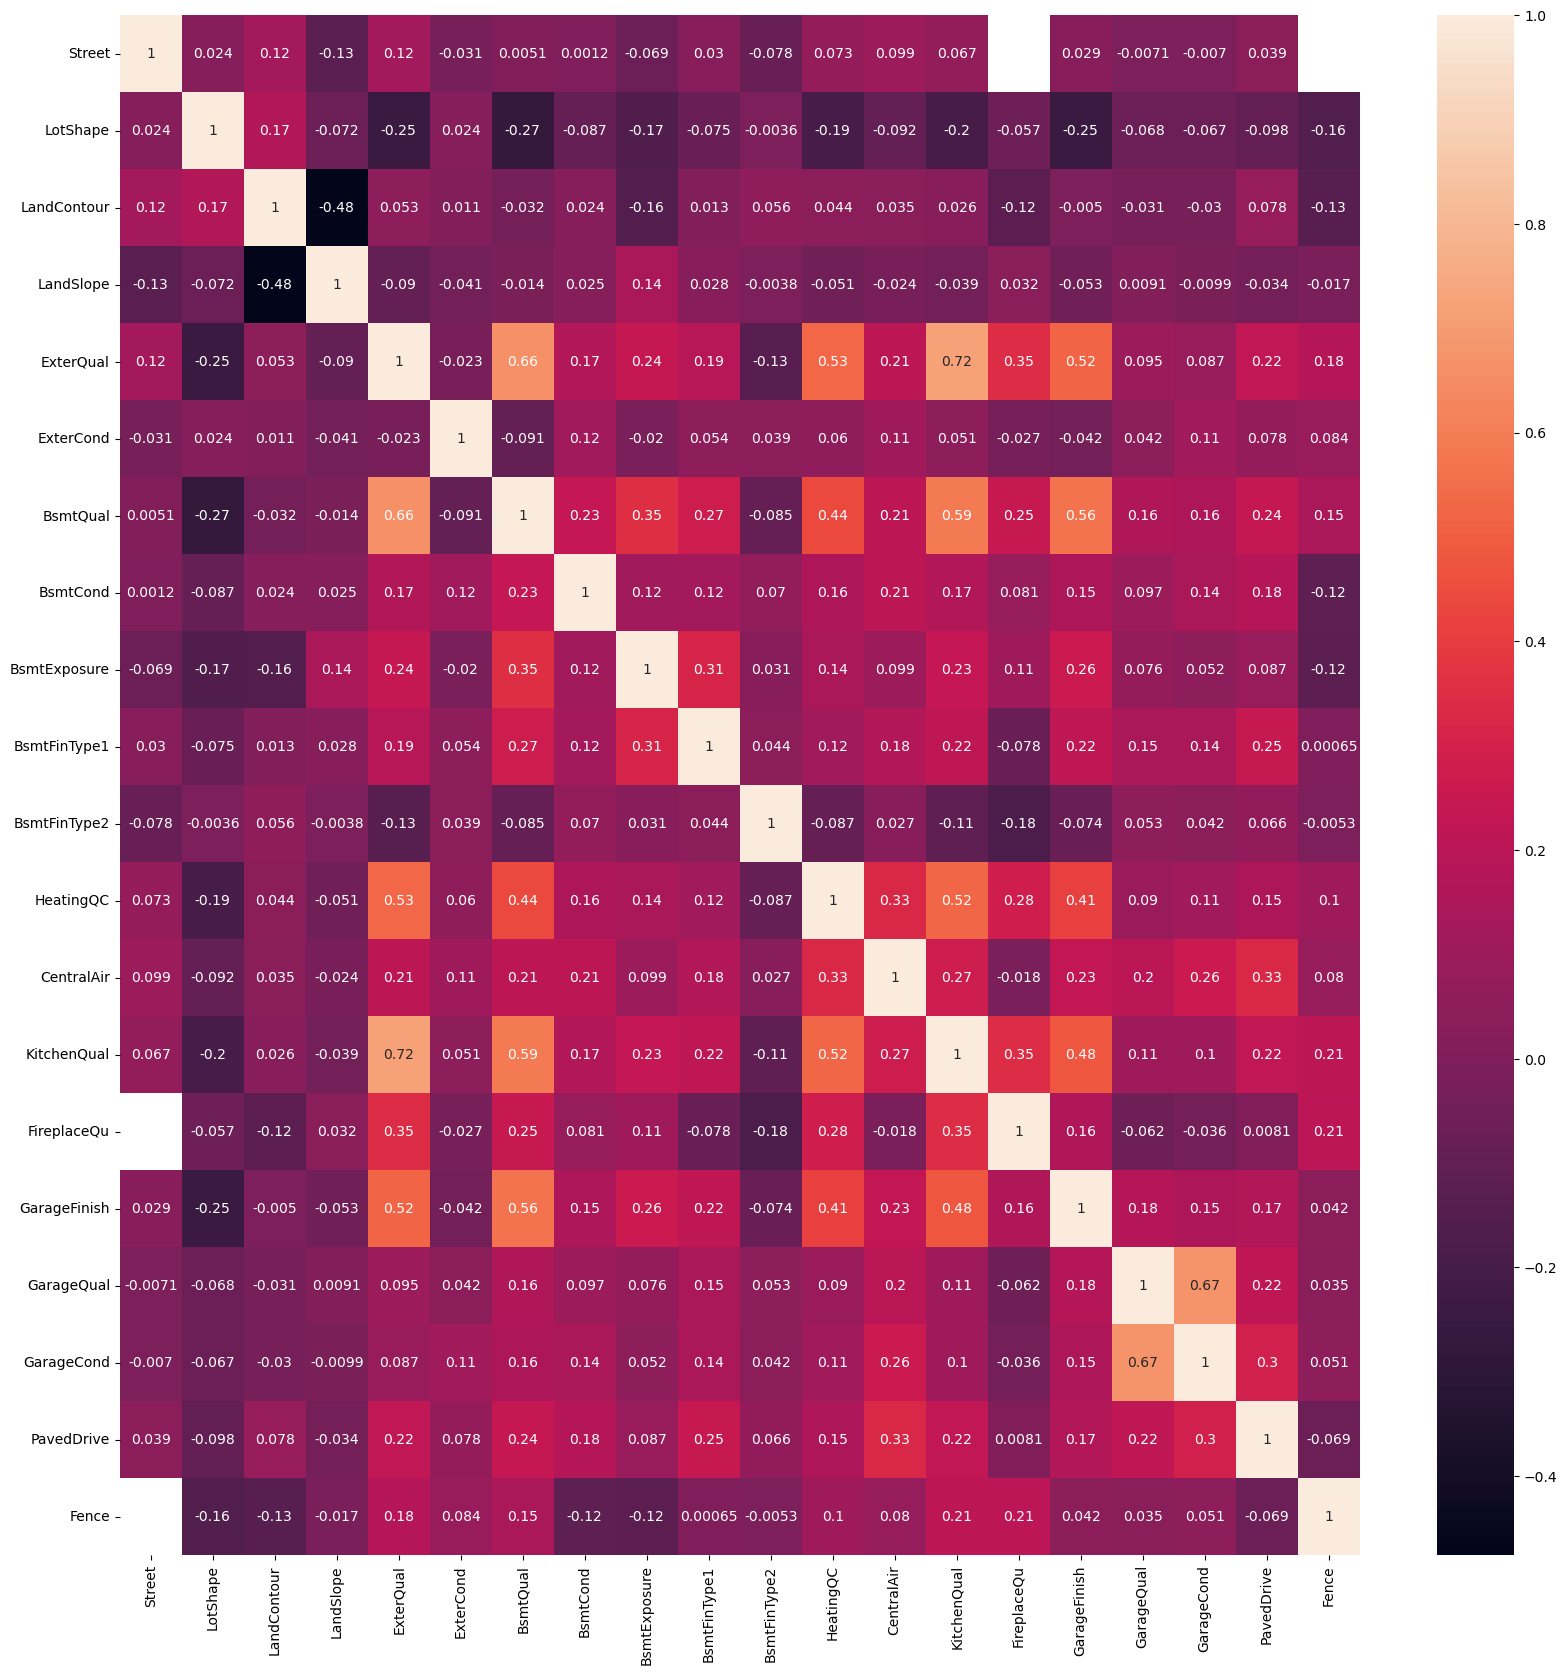

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(df[ord_cols].corr(),annot=True)

In [48]:
# Also observe the strong correlation between GarageQual and GarageCond.
# Let's remove GarageQual (it doesn't sound right. No one uses that phrase)
df.drop(['GarageQual'],axis=1,inplace=True)
ord_cols.remove('GarageQual')

<Axes: >

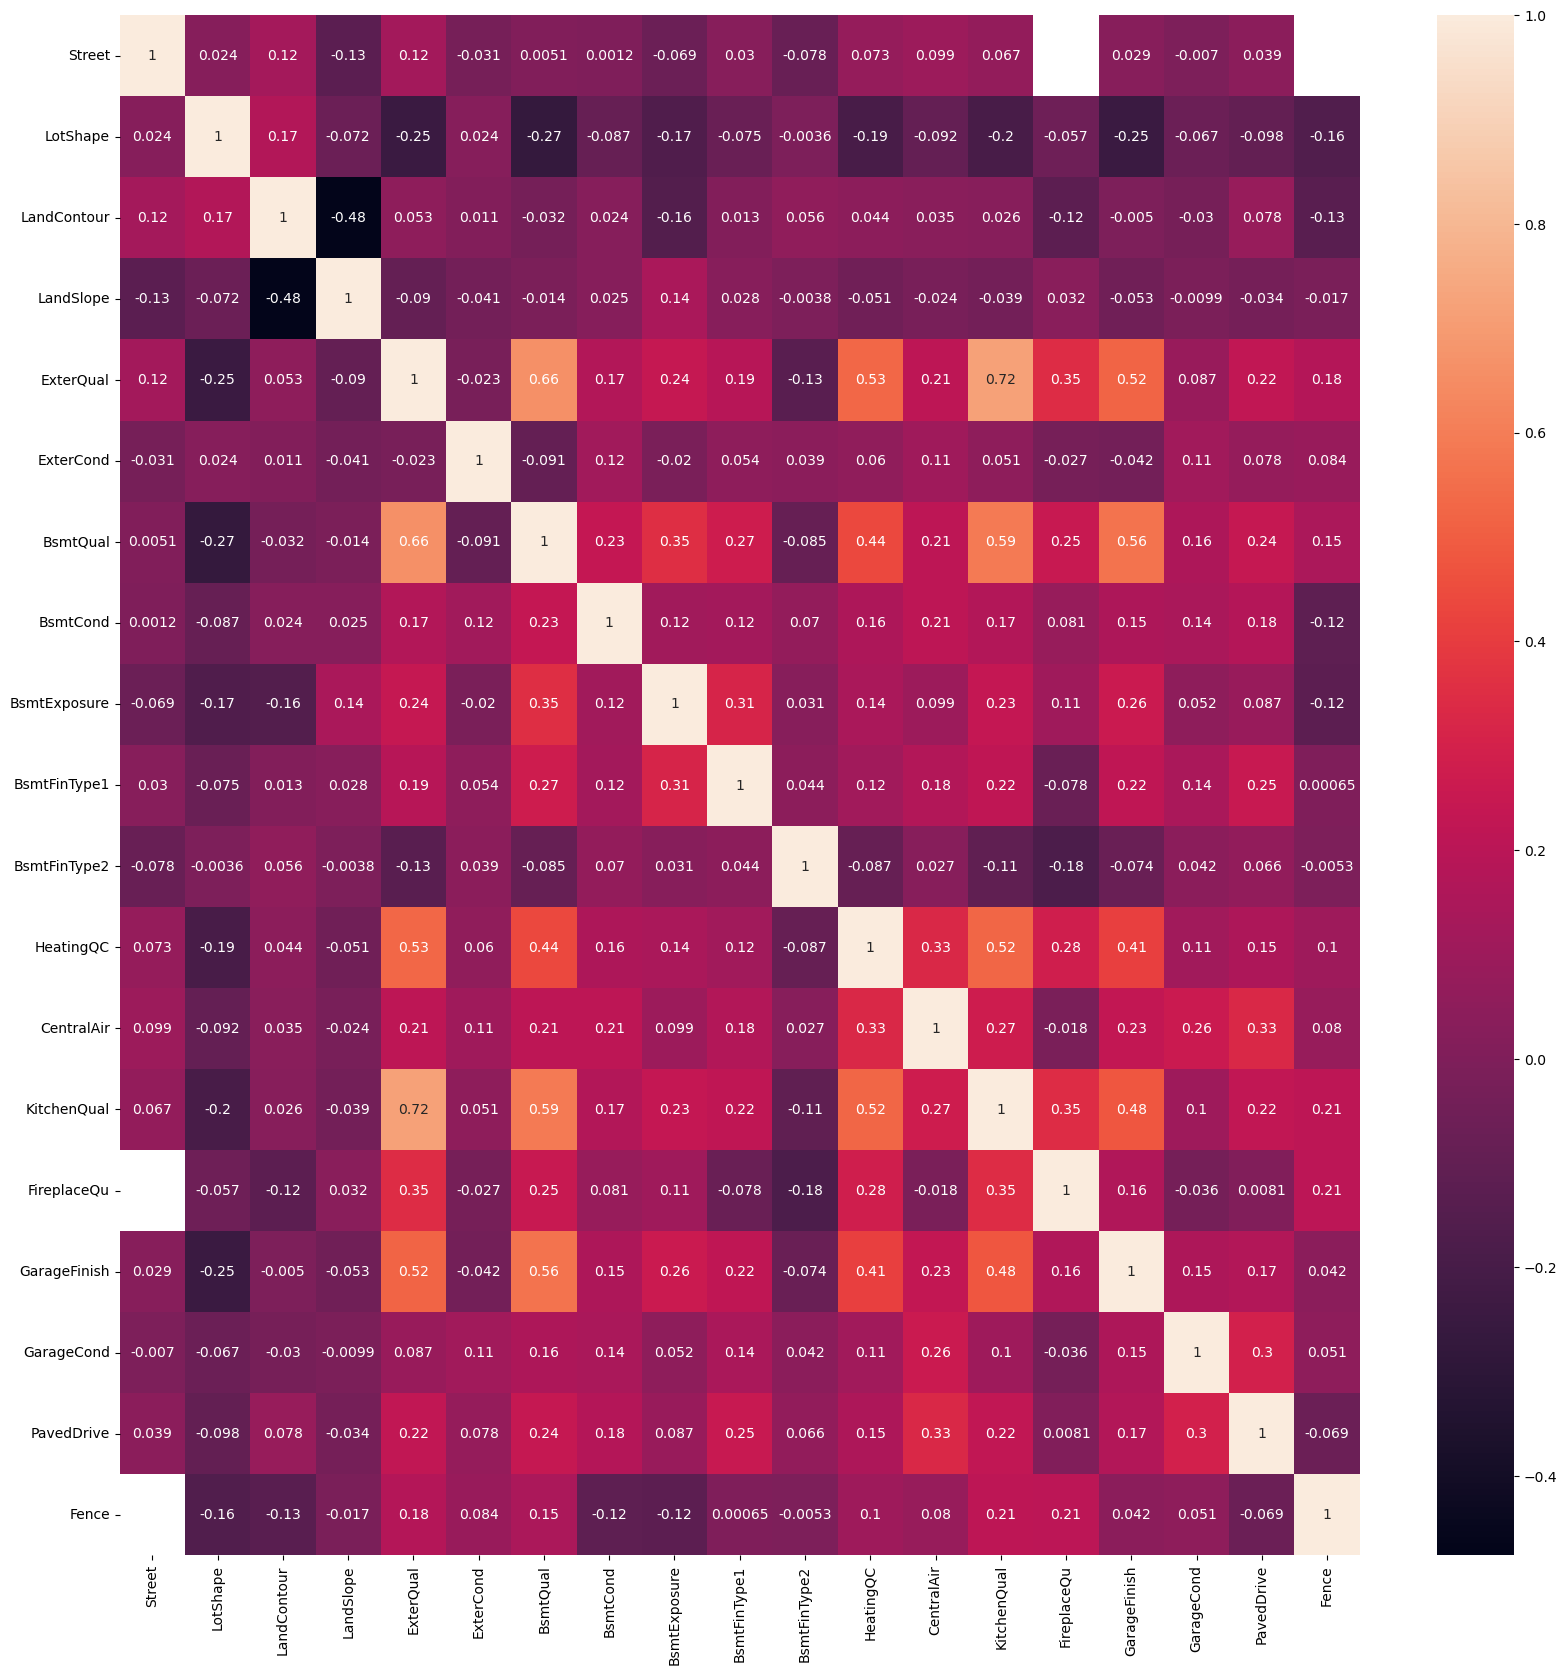

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df[ord_cols].corr(),annot=True)

# Data splitting to test and training

In [50]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

In [51]:
scaler = MinMaxScaler()

df_train[num_cols+ord_cols] = scaler.fit_transform(df_train[num_cols+ord_cols])
df_train.head()

LotFrontage   LotArea  Street  LotShape  LandContour  LandSlope  \
278      0.534161  0.548236     1.0  1.000000          1.0        0.0   
544      0.229814  0.658884     1.0  0.666667          1.0        0.0   
899      0.273292  0.237347     1.0  1.000000          1.0        0.0   
519      0.198758  0.400984     1.0  1.000000          1.0        0.0   
1004     0.136646  0.078462     1.0  1.000000          1.0        0.0   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
278      0.888889     0.428571   0.971014      0.950000  ...               0   
544      0.666667     0.428571   0.971014      0.933333  ...               0   
899      0.444444     0.714286   0.644928      0.733333  ...               0   
519      0.666667     1.000000   0.391304      0.900000  ...               0   
1004     0.666667     0.428571   0.963768      0.933333  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
278                0             1             0            0   
544                0             1             0            0   
899                0             0             0            1   
519                0             0             0            1   
1004               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
278                       0                     0                     0   
544                       0                     0                     0   
899                       0                     0                     0   
519                       0                     0                     0   
1004                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
278                      0                      1  
544                      0                      1  
899                      1                      0  
519                      1                      0  
1004                     1                      0  

[5 rows x 191 columns]

In [52]:
df_test[num_cols+ord_cols] = scaler.transform(df_test[num_cols+ord_cols])

# Feature selection

In [53]:
X_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop(['SalePrice'],axis=1)
y_test = df_test.SalePrice

In [63]:

X_train.fillna(X_train.mean(), inplace=True)

In [64]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=40)
rfe = rfe.fit(X_train,y_train)

In [65]:
col = list(X_train.columns[rfe.support_])

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

C:\Users\Nidhi\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Nidhi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                Features   VIF
139  Exterior2nd_CmentBd   inf
104      BldgType_Duplex   inf
125   Exterior1st_CBlock   inf
126  Exterior1st_CemntBd   inf
138   Exterior2nd_CBlock   inf
..                   ...   ...
66         LotConfig_FR3  1.19
98       Condition1_RRNe  1.18
94       Condition1_PosA   NaN
128  Exterior1st_ImStucc   NaN
164       Electrical_Mix   NaN

[190 rows x 2 columns]


<Axes: >

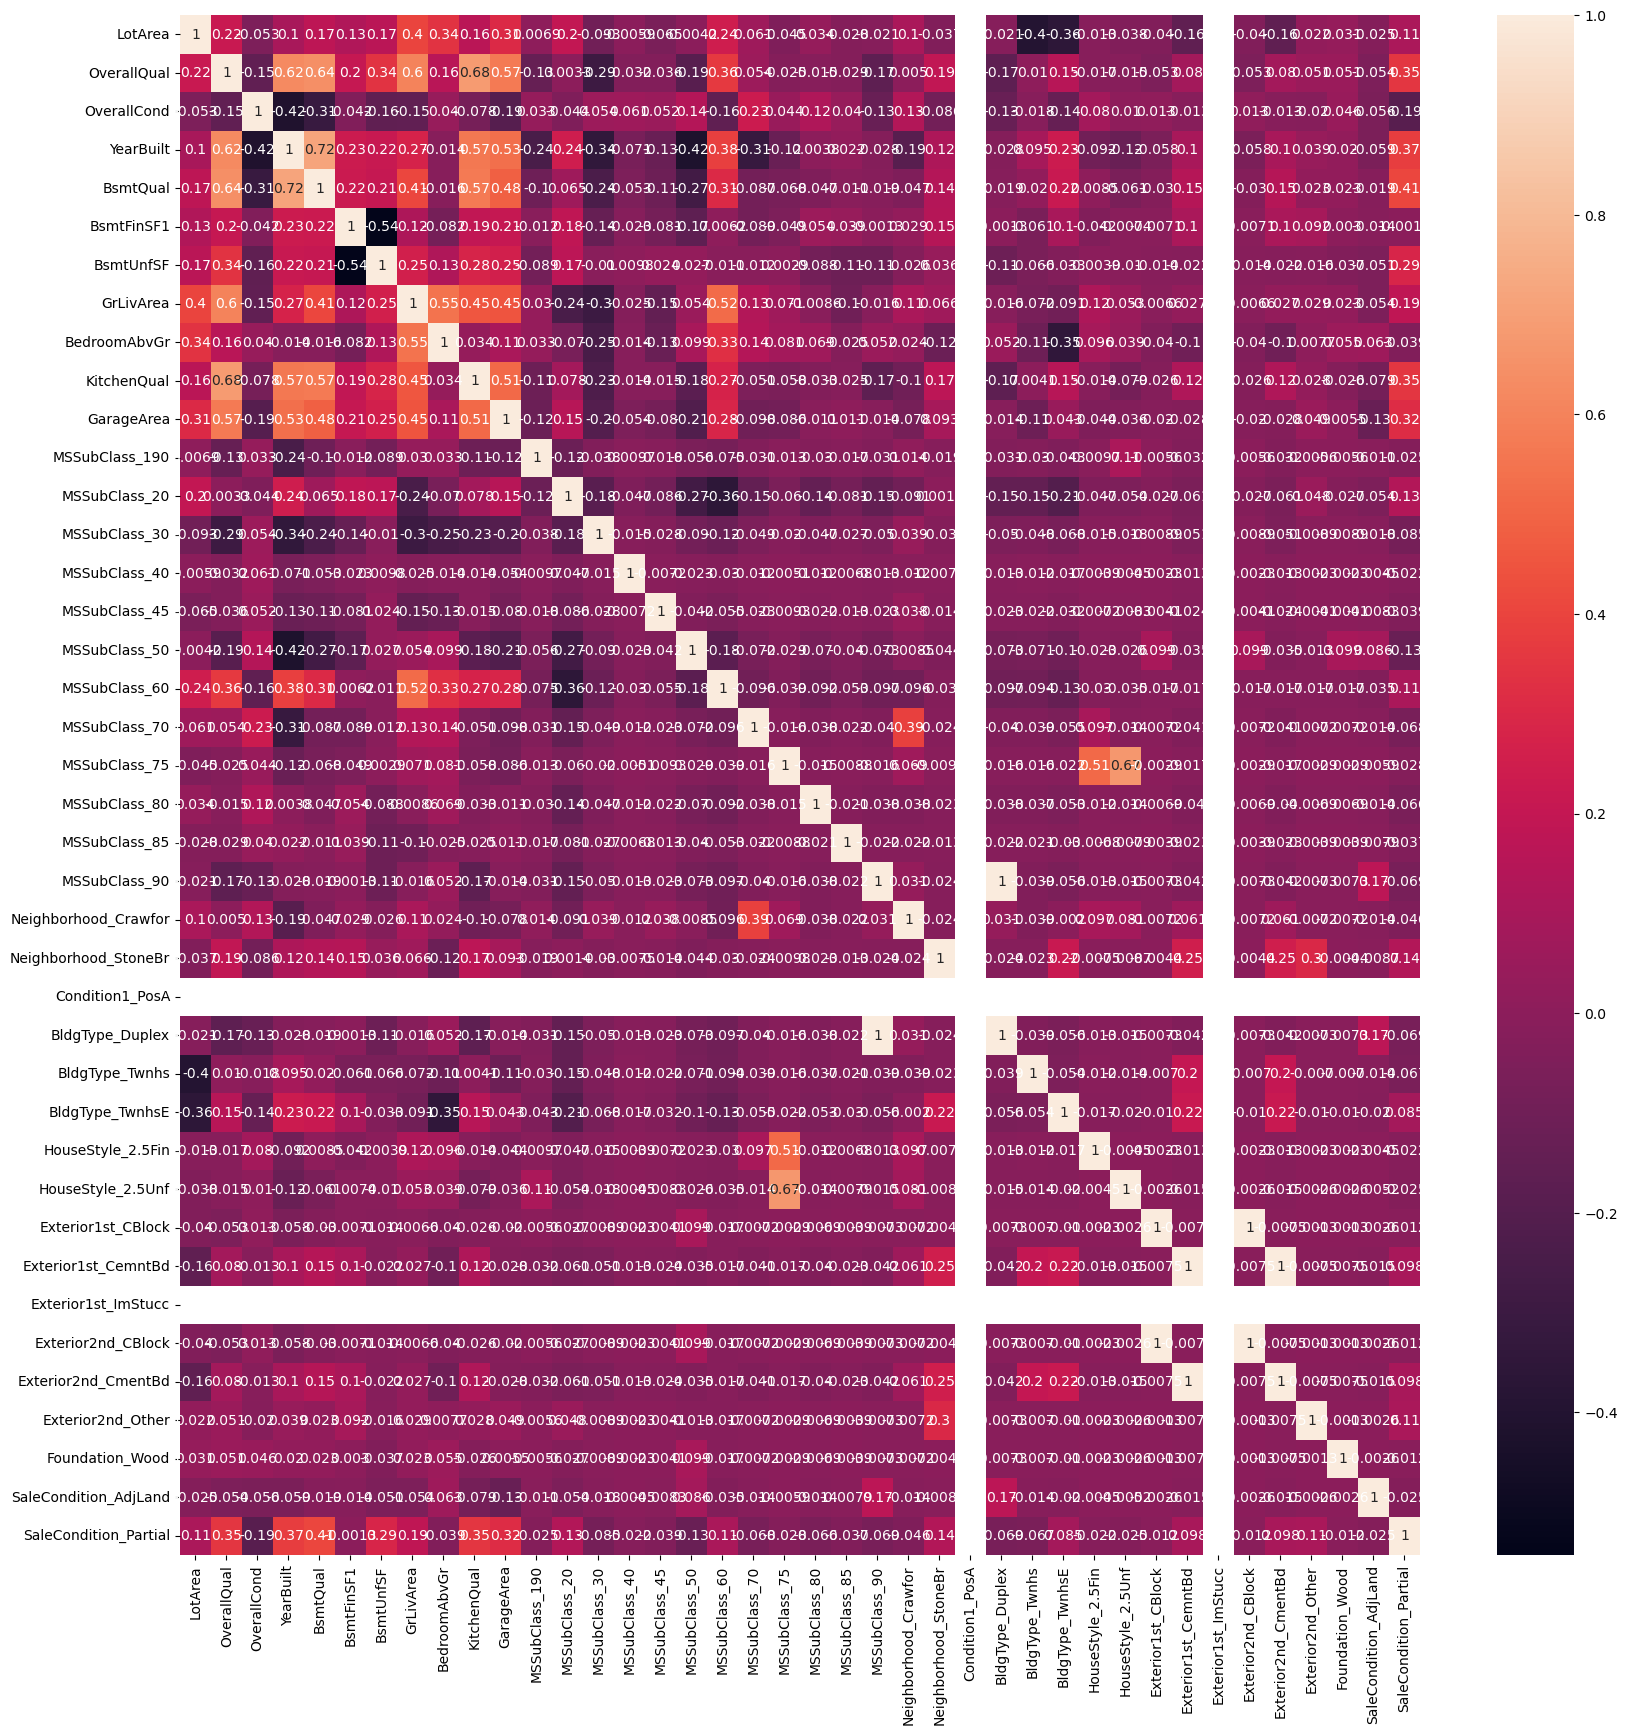

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[col].corr(),annot=True)

In [68]:
# Create correlation matrix
corr_matrix = X_train[col].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
X_train = X_train[col].drop(to_drop, axis=1)

In [69]:
X_test = X_test[X_train.columns]

<Axes: >

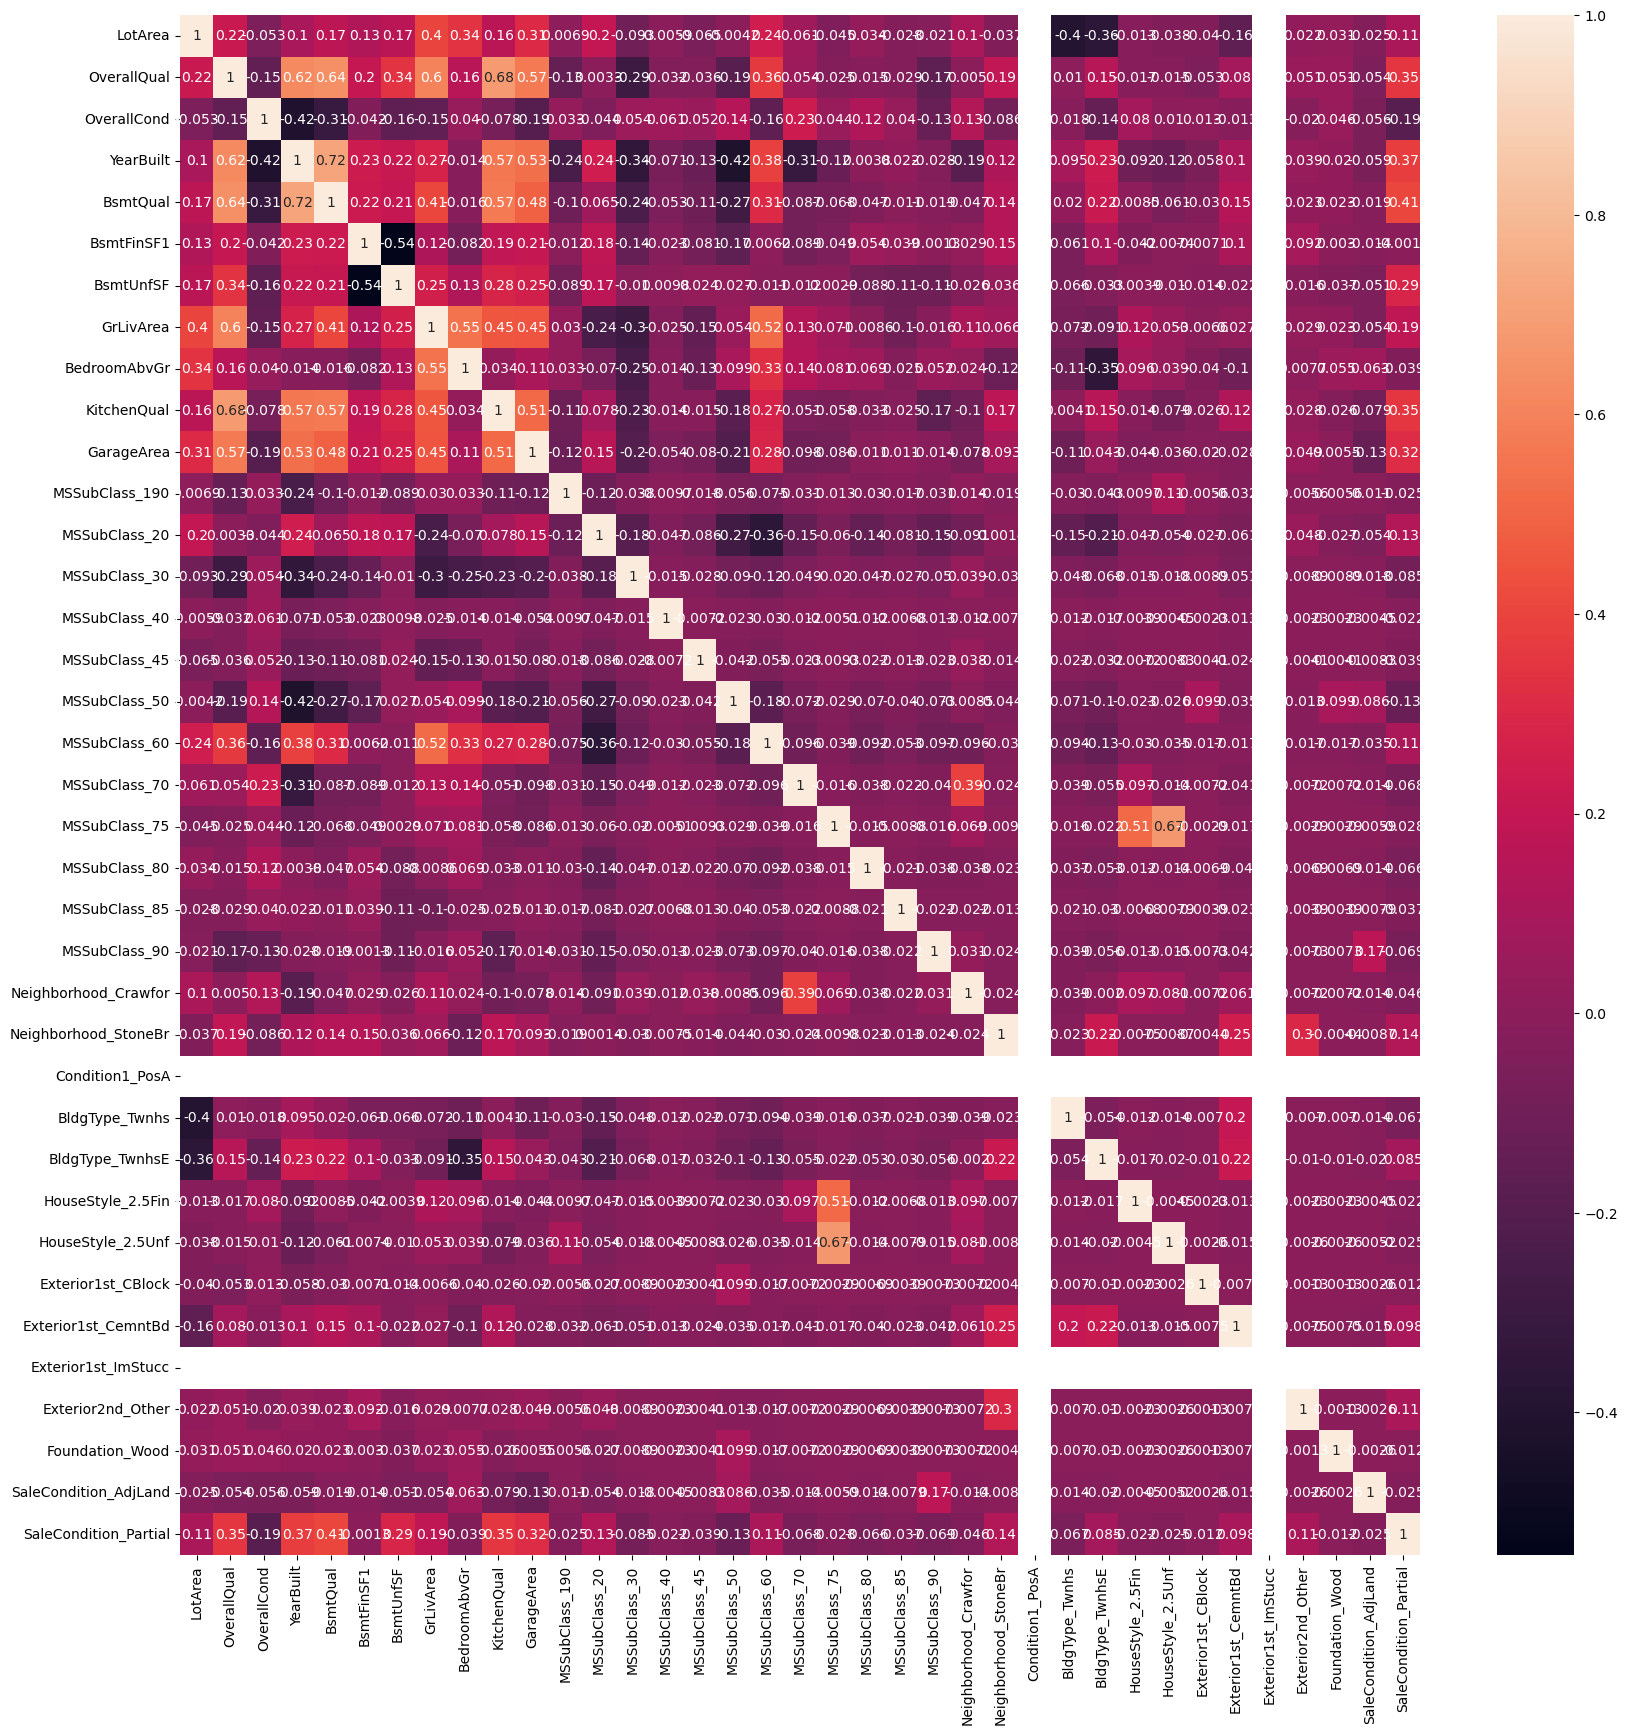

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                 Features    VIF
12          MSSubClass_20  38.45
17          MSSubClass_60  26.03
16          MSSubClass_50   9.93
27        BldgType_TwnhsE   8.28
3               YearBuilt   7.38
20          MSSubClass_80   5.04
26         BldgType_Twnhs   4.96
22          MSSubClass_90   4.63
7               GrLivArea   4.60
18          MSSubClass_70   4.54
19          MSSubClass_75   4.22
13          MSSubClass_30   4.13
1             OverallQual   3.85
6               BsmtUnfSF   3.42
5              BsmtFinSF1   2.99
4                BsmtQual   2.84
29      HouseStyle_2.5Unf   2.77
11         MSSubClass_190   2.61
9             KitchenQual   2.41
21          MSSubClass_85   2.29
28      HouseStyle_2.5Fin   2.10
8            BedroomAbvGr   2.06
10             GarageArea   1.97
0                 LotArea   1.92
15          MSSubClass_45   1.84
2             OverallCond   1.51
36  SaleCondition_Partial   1.36
23   Neighborhood_Crawfor   1.31
14          MSSubClass_40   1.31
24   Neigh

C:\Users\Nidhi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [72]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[1e-6,1e-5,1e-4, 1e-3, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005861      0.005049         0.001478        0.000891     0.000001   
1       0.003434      0.003029         0.001411        0.002476     0.000010   
2       0.003774      0.003584         0.002245        0.003202     0.000100   
3       0.002060      0.001121         0.001794        0.001068     0.001000   
4       0.001207      0.002627         0.002981        0.003788     0.010000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.037222          -0.031626          -0.030787   
1   {'alpha': 1e-05}          -0.037124          -0.031488          -0.030745   
2  {'alpha': 0.0001}          -0.036382          -0.032490          -0.030273   
3   {'alpha': 0.001}          -0.037271          -0.031199          -0.030981   
4    {'alpha': 0.01}          -0.073959          -0.064571          -0.062620   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.030343  ...           -0.030123           -0.030132   
1          -0.030314  ...           -0.030158           -0.030174   
2          -0.030128  ...           -0.030449           -0.030513   
3          -0.030742  ...           -0.032826           -0.032833   
4          -0.053664  ...           -0.066042           -0.066258   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.029919           -0.028931           -0.029233   
1           -0.029957           -0.028964           -0.029256   
2           -0.030212           -0.029260           -0.029538   
3           -0.032630           -0.031851           -0.032215   
4           -0.066130           -0.066672           -0.066654   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.030291           -0.029935           -0.030410   
1           -0.030335           -0.029975           -0.030431   
2           -0.030642           -0.030180           -0.030610   
3           -0.032919           -0.032215           -0.032956   
4           -0.066447           -0.067049           -0.066490   

   mean_train_score  std_train_score  
0         -0.029826         0.000471  
1         -0.029859         0.000472  
2         -0.030124         0.000451  
3         -0.032485         0.000387  
4         -0.066492         0.000282  

[5 rows x 31 columns]

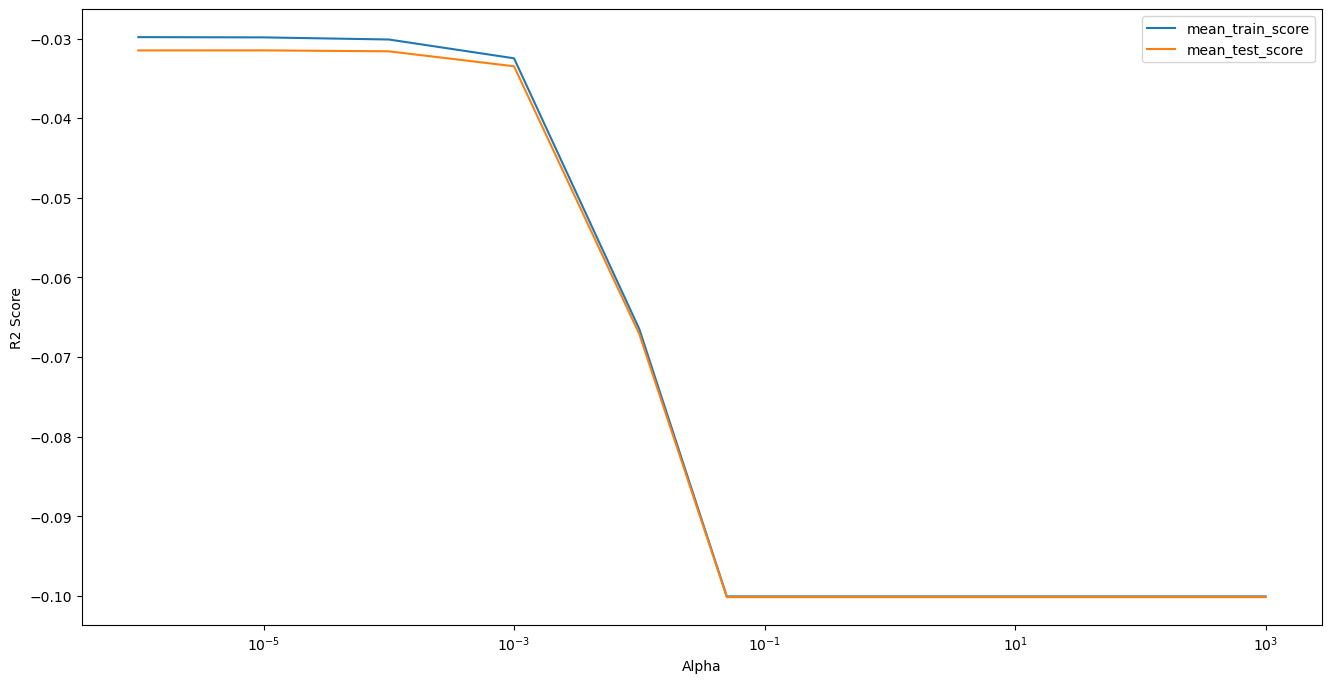

In [74]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [75]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-05}

In [81]:

X_train.fillna(X_train.mean(), inplace=True)

X_test.fillna(X_test.mean(), inplace=True)

y_train.fillna(y_train.mean(), inplace=True)


In [82]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.898198427120424
0.8692872301632839


In [84]:
model_param = list(lasso.coef_)
model_param.append(lasso.intercept_)
cols = list(X_train.columns)
cols.append('constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef

Featuere      Coef
0                 LotArea  0.046767
1             OverallQual  0.186345
2             OverallCond  0.064858
3               YearBuilt  0.051549
4                BsmtQual  0.066794
5              BsmtFinSF1  0.112892
6               BsmtUnfSF  0.072417
7               GrLivArea  0.315413
8            BedroomAbvGr -0.064095
9             KitchenQual  0.039490
10             GarageArea  0.082984
11         MSSubClass_190 -0.022657
12          MSSubClass_20  0.010143
13          MSSubClass_30  0.023970
14          MSSubClass_40 -0.009377
15          MSSubClass_45  0.011156
16          MSSubClass_50 -0.004211
17          MSSubClass_60  0.015065
18          MSSubClass_70 -0.004761
19          MSSubClass_75  0.065639
20          MSSubClass_80  0.003840
21          MSSubClass_85  0.013811
22          MSSubClass_90 -0.024824
23   Neighborhood_Crawfor  0.041062
24   Neighborhood_StoneBr  0.074367
25        Condition1_PosA  0.000000
26         BldgType_Twnhs -0.035248
27        BldgType_TwnhsE -0.022507
28      HouseStyle_2.5Fin -0.108775
29      HouseStyle_2.5Unf -0.096884
30     Exterior1st_CBlock -0.000000
31    Exterior1st_CemntBd  0.031774
32    Exterior1st_ImStucc  0.000000
33      Exterior2nd_Other -0.044646
34        Foundation_Wood -0.071401
35  SaleCondition_AdjLand  0.037576
36  SaleCondition_Partial  0.051875
37               constant -0.172372

In [93]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere      Coef
7               GrLivArea  0.315413
1             OverallQual  0.186345
5              BsmtFinSF1  0.112892
10             GarageArea  0.082984
24   Neighborhood_StoneBr  0.074367
6               BsmtUnfSF  0.072417
4                BsmtQual  0.066794
19          MSSubClass_75  0.065639
2             OverallCond  0.064858
36  SaleCondition_Partial  0.051875

# Ridge

In [86]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.007857      0.007859         0.002216        0.004876       0.0001   
1       0.004691      0.007165         0.002515        0.005212       0.0010   
2       0.005943      0.007328         0.000353        0.001058       0.0100   
3       0.005993      0.007375         0.003125        0.006250       0.0500   
4       0.004978      0.007639         0.000209        0.000628       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.037233          -0.031672          -0.030791   
1   {'alpha': 0.001}          -0.037232          -0.031663          -0.030790   
2    {'alpha': 0.01}          -0.037223          -0.031584          -0.030785   
3    {'alpha': 0.05}          -0.037184          -0.031285          -0.030761   
4     {'alpha': 0.1}          -0.037140          -0.031405          -0.030731   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.030345  ...           -0.030121           -0.030127   
1          -0.030344  ...           -0.030121           -0.030128   
2          -0.030334  ...           -0.030122           -0.030133   
3          -0.030291  ...           -0.030134           -0.030157   
4          -0.030239  ...           -0.030148           -0.030184   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.029914           -0.028930           -0.029231   
1           -0.029915           -0.028930           -0.029232   
2           -0.029919           -0.028930           -0.029234   
3           -0.029935           -0.028940           -0.029242   
4           -0.029952           -0.028959           -0.029252   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.030289           -0.029930            -0.03041   
1           -0.030289           -0.029931            -0.03041   
2           -0.030292           -0.029936            -0.03041   
3           -0.030312           -0.029956            -0.03042   
4           -0.030336           -0.029978            -0.03043   

   mean_train_score  std_train_score  
0         -0.029823         0.000471  
1         -0.029823         0.000471  
2         -0.029826         0.000472  
3         -0.029840         0.000475  
4         -0.029857         0.000476  

[5 rows x 31 columns]

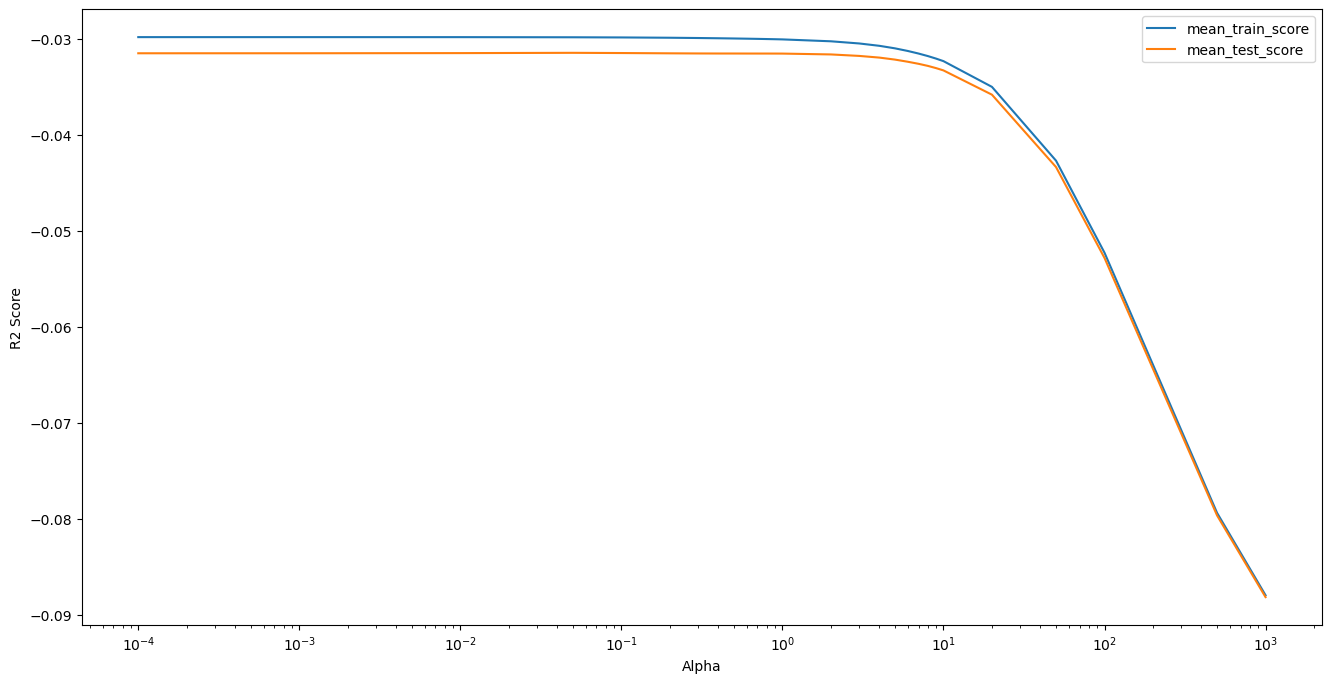

In [88]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [89]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.05}

In [90]:
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8982279655758633
0.8689373728225971


In [91]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [92]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feature      Coef
7               GrLivArea  0.314745
1             OverallQual  0.185429
5              BsmtFinSF1  0.113211
10             GarageArea  0.083543
24   Neighborhood_StoneBr  0.075401
6               BsmtUnfSF  0.072902
19          MSSubClass_75  0.069430
4                BsmtQual  0.067124
2             OverallCond  0.065352
36  SaleCondition_Partial  0.051918

Thus, after optimizing for lambda and R-squared scored, our final model would be Lasso regularized linear regression with lambda = 1e-05

We selected this because of the highest R-squared scores and since many coefficients were 0, resulting in feature selection.

R-squared for training =0.898198427120424

R-squared for testing =0.8982279655758633